<a href="https://colab.research.google.com/github/bdrinconp/ml_stats_classes/blob/main/code_samples/clase1_analisis_exploratorio_heart_disease_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enfermedad Cardíaca - Análisis Exploratorio de Datos
**¿Qué es la enfermedad cardíaca?**  
[La enfermedad cardíaca (o enfermedad cardiovascular)](https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1) es un término general para las condiciones del cuerpo que afectan al corazón o los vasos sanguíneos. Es una de las 10 principales causas de muerte a nivel mundial y se estima que 17.9 millones de personas mueren cada año por enfermedades cardiovasculares, lo que representa el 31% de todas las muertes globales.

**Sobre el conjunto de datos**  
Utilizaremos un conjunto de datos de UCI Machine Learning, [Enfermedad Cardíaca UCI](https://archive.ics.uci.edu/dataset/45/heart+disease). Este conjunto de datos contiene 13 atributos relacionados con la enfermedad cardíaca, como tipos de dolor en el pecho, presión arterial y colesterol de 303 pacientes. Intentaremos explorar este conjunto de datos para encontrar información sobre la enfermedad cardíaca. Exploraremos estadísticas y relaciones con la enfermedad cardíaca en este conjunto de datos utilizando visualización de datos.

## 1. Importar librerias

In [ ]:
# Instalamos el repositorio
# ==============================================================================
!pip install ucimlrepo

In [ ]:
# Importamos el repositorio de ml
# ==============================================================================
from ucimlrepo import fetch_ucirepo
# Otras librerias
# ==============================================================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

## 2. Cargar datos

In [ ]:
# Obtener los datos
# ==============================================================================
# obtener dataset
heart_disease = fetch_ucirepo(id=45)

# datos: X son las caracteristicas, y es la variable objetivo
X = heart_disease.data.features
y = heart_disease.data.targets

# Unificamos todo en una sola estructura
df0 = pd.concat([X, y], axis=1)

In [ ]:
#y.head()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [ ]:
df0.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## 3. Preparación de datos

### 3-0. Codificación de la variable objetivo (target)

La codificación se efectúa mediante la variable **num**, que originalmente posee los siguientes significados:   

num: Indicador de la presencia de enfermedad cardíaca (Variable categórica con cuatro niveles)  
0: Saludable  
1: Diagnosticado en etapa 1   
2: Diagnosticado en etapa 2   
3: Diagnosticado en etapa 3   
4: Diagnosticado en etapa 4


In [ ]:
# Codificar la variable 'num
# ==============================================================================
df0['target'] = df0['num'].apply(lambda x: 1 if x > 0 else 0)
df = df0.drop('num', axis = 1)

In [ ]:
# Visualizamos el dataframe 'df0'
# ==============================================================================
df0.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1,1


In [ ]:
df = df0.drop('num', axis = 1)

In [ ]:
# Visualizamos el dataframe 'df'
# ==============================================================================
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


### 3-1. Descripción de los datos

Las siguientes características se utilizan para la predicción de la presencia de enfermedades cardíacas:
1. **<font color="Black">age</font>**: Edad en años
2. **<font color="Black">sex</font>**:
   * 0 = Femenino
   * 1 = Masculino
3. **<font color="Black">cp</font>**: Tipos de dolor en el pecho
   * Value 1: Angina típica
   * Value 2: Angina atípica
   * Value 3: Dolor no anginoso
   * Value 4: Asintomático
4. **<font color="Black">trestbps</font>**: Presión arterial en reposo (mmHg)
   * Presión arterial alta = 140 mmHg o más
5. **<font color="Black">chol</font>**: Colesterol sérico (mg/dL)
   * Cálculo = HDL + LDL + 0.2 * triglicéridos
   * Mayor de 200 mg/dL es preocupante
6. **<font color="Black">fbs</font>**: Azúcar en sangre en ayunas (> 120 mg/dL)
   * 0 = Falso
   * 1 = Verdadero
   * Mayor de 126 mg/dL indica diabetes
7. **<font color="Black">restecg</font>**: Resultados electrocardiográficos en reposo
   * 0 = Normal
   * 1 = Onda ST-T anormal
   * 2 = Muestra hipertrofia ventricular izquierda probable o definitiva
8. **<font color="Black">thalach</font>**: Frecuencia cardíaca máxima alcanzada (bpm)
9. **<font color="Black">exang</font>**: Angina inducida por ejercicio
   * 0 = Negativo
   * 1 = Positivo
10. **<font color="Black">oldpeak</font>**: Depresión del segmento ST inducida por ejercicio relativa al reposo
11. **<font color="Black">slope</font>**: Pendiente del segmento ST en el pico del ejercicio
    * 1 = Ascendente
    * 2 = Horizontal
    * 3 = Descendente
12. **<font color="Black">ca</font>**: Número de vasos principales (0-3) coloreados por fluoroscopia
    * Los vasos sanguíneos coloreados están pasando a través
    * Hay un coágulo si el vaso sanguíneo no está coloreado
13. **<font color="Black">thal</font>**: Centelleografía de talio
    * 3 = Normal
    * 6 = Defecto fijo
    * 7 = Defecto reversible
14. **<font color="Black">target</font>**: Enfermedad cardíaca
    * 0 = SIN presencia de enfermedad cardiaca
    * 1 = CON presencia de enfermedad cardíaca


### 3-2. Renombrar columnas

Algunos de los nombres originales de las columnas son un poco difíciles de identificar en cuanto a qué se refiere el contenido de la columna. Intentaremos renombrar esas columnas para que sean más fáciles de entender.

In [ ]:
# Renombrar columnas
# ==============================================================================
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp',
              'Cholesterol', 'Fasting_bs', 'Resting_ecg',
              'Max_heart_rate', 'Exercise_induced_angina',
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 'Cholesterol',
       'Fasting_bs', 'Resting_ecg', 'Max_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope',
       'Num_major_vessels', 'Thallium_test', 'Condition'],
      dtype='object')

Las **características renombradas** son las siguientes:
1. **<font color="Black">age</font>** -> **<font color="MediumBlue">Age (Edad)</font>**
2. **<font color="Black">sex</font>** -> **<font color="MediumBlue">Sex (Sexo)</font>**
3. **<font color="Black">cp</font>** -> **<font color="MediumBlue">Chest_pain_type (Tipo de dolor de pecho)</font>**
4. **<font color="Black">trestbps</font>** -> **<font color="MediumBlue">Resting_bp (Presión arterial en reposo)</font>**
5. **<font color="Black">chol</font>** -> **<font color="MediumBlue">Cholesterol (Colesterol)</font>**
6. **<font color="Black">fbs</font>** -> **<font color="MediumBlue">Fasting_bs (Azúcar en sangre en ayunas)</font>**
7. **<font color="Black">restecg</font>** -> **<font color="MediumBlue">Resting_ecg (Electrocardiograma en reposo)</font>**
8. **<font color="Black">thalach</font>** -> **<font color="MediumBlue">Max_heart_rate (Frecuencia cardíaca máxima)</font>**
9. **<font color="Black">exang</font>** -> **<font color="MediumBlue">Exercise_induced_angina (Angina inducida por ejercicio)</font>**
10. **<font color="Black">oldpeak</font>** -> **<font color="MediumBlue">ST_depression (Depresión del segmento ST)</font>**
11. **<font color="Black">slope</font>** -> **<font color="MediumBlue">ST_slope (Pendiente del segmento ST)</font>**
12. **<font color="Black">ca</font>** -> **<font color="MediumBlue">Num_major_vessels (Número de vasos sanguíneos principales)</font>**
13. **<font color="Black">thal</font>** -> **<font color="MediumBlue">Thallium_test (Prueba de talio)</font>**
14. **<font color="Black">target</font>** -> **<font color="MediumBlue">Condition (Condición)</font>**


In [ ]:
# Visualizamos el dataframe
# ==============================================================================
df.head()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### 3-3. Verificar Valores Faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        299 non-null    float64
 12  Thallium_test            301 non-null    float64
 13  Condition                303 non-null    int64  
dtypes: float64(3), int64(11)
m

In [ ]:
# Obtenemos estadísticas descriptivas
# ==============================================================================
df.describe()

,Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
df.shape

(303, 14)

In [ ]:
# Revisamos los tipos de datos y estructura del conjunto de datos
# ==============================================================================
df.info()

print()
print(f'Estructura del conjunto de datos:')
print(f'Número de variables (columnas): {df.shape[1]}')
print(f'Número de observaciones (filas): {df.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain_type          303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_bs               303 non-null    int64  
 6   Resting_ecg              303 non-null    int64  
 7   Max_heart_rate           303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Num_major_vessels        299 non-null    float64
 12  Thallium_test            301 non-null    float64
 13  Condition                303 non-null    int64  
dtypes: float64(3), int64(11)
m

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          4
Thallium_test              2
Condition                  0
dtype: int64

In [ ]:
# Revisamos columnas con datos faltantes
# ==============================================================================
msng_info = pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns = {'index':'columna',0:'obs_faltantes'}, inplace = True)
msng_info['%obs_faltantes'] = msng_info['obs_faltantes']/df.shape[0]*100
msng_info.sort_values('obs_faltantes', ascending= False)
msng_info[msng_info['%obs_faltantes']>=0].head(20)

,columna,obs_faltantes,%obs_faltantes
0,Age,0,0.000000
1,Sex,0,0.000000
2,Chest_pain_type,0,0.000000
3,Resting_bp,0,0.000000
4,Cholesterol,0,0.000000
5,Fasting_bs,0,0.000000
6,Resting_ecg,0,0.000000
7,Max_heart_rate,0,0.000000
8,Exercise_induced_angina,0,0.000000
9,ST_depression,0,0.000000




Como podemos ver arriba, este conjunto de datos tiene algunas columnas con datos faltantes, por lo tanto, procedemos a realizar un proceso sencillo de imputación.

- ¿Cuál es el porcentaje máximo de datos faltantes que podríamos tolerar en una columna antes de considerar eliminarla?

[link](https://www.sciencedirect.com/science/article/pii/S0895435618308710#:~:text=A%20small%20number%20of%20studies,22%5D%3B%20mixed%20results%20were)

- ¿Los datos faltantes son completamente aleatorios o hay algún patrón?

[link](https://www.sciencedirect.com/science/article/abs/pii/S1551741121001157#:~:text=Missing%20data%20may%20be%20classified,Missing%20Completely%20at%20random)


### 3-4. Imputación de datos

En el análisis de datos, a veces nos encontramos con información incompleta o faltante. Para solucionar esto en este caso hacemos uso de la media, la mediana y la moda para llenar estos datos vacíos. Existen otras alternativas para atacar este problema:

https://cesarquezadab.com/2021/09/19/guia-sobre-tecnicas-de-imputacion-de-datos-con-python/

<Axes: xlabel='Num_major_vessels', ylabel='count'>

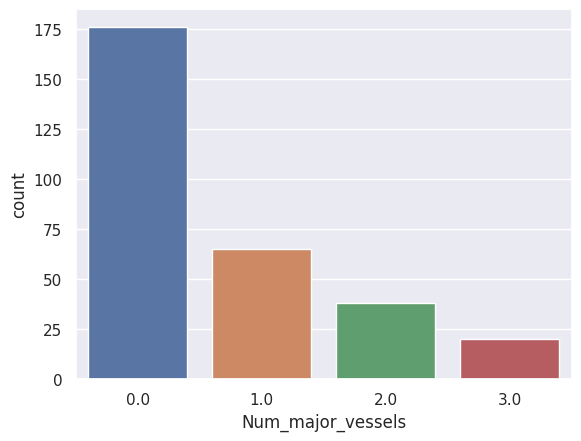

In [ ]:
# Imputamos los valores faltantes para la columnas "Num_major_vessels"
# ==============================================================
sns.countplot(data=df,x='Num_major_vessels') # hue = 'Condition'

Se debe tener cuidado ya que cuando se utiliza sns.countplot con la biblioteca Seaborn para crear un gráfico de conteo, los datos faltantes (por lo general representados como NaN en un DataFrame de Pandas) no se mostrarán en el gráfico. Seaborn automáticamente omite los valores NaN al generar el gráfico.

In [ ]:
# Imputamos los valores faltantes para la columnas "Num_major_vessels"
# ==============================================================
print('Moda Num_major_vessels:',df['Num_major_vessels'].mode()[0])
print('Mediana Num_major_vessels:',df['Num_major_vessels'].median())
print('Media Num_major_vessels:',df['Num_major_vessels'].mean())
#df['Num_major_vessels'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

Moda Num_major_vessels: 0.0
Mediana Num_major_vessels: 0.0
Media Num_major_vessels: 0.6722408026755853


¿Cuales de estas medidas de centralidad son buenos cantidatos para realizar el proceso de imputación de la variable "Num_major_vessels" ?

In [ ]:
# Imputamos los valores faltantes para la columnas "Num_major_vessels"
# ==============================================================
df['Num_major_vessels'] = df['Num_major_vessels'].fillna((df['Num_major_vessels'].mode()[0]))
df['Num_major_vessels'].isnull().sum()

0

<Axes: xlabel='Thallium_test', ylabel='count'>

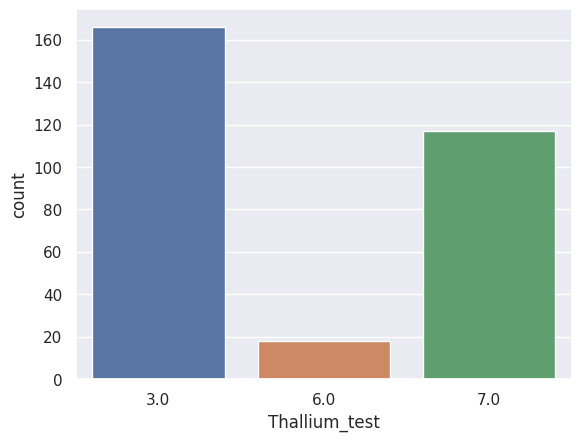

In [ ]:
# Imputamos los valores faltantes para la columna "Thallium_test"
# ==============================================================
sns.countplot(data=df,x='Thallium_test') # hue = 'Condition'

In [ ]:
# Imputamos los valores faltantes para la columna "Thallium_test"
# ==============================================================
print('Moda Num_major_vessels:',df['Thallium_test'].mode()[0])
print('Mediana Num_major_vessels:',df['Thallium_test'].median())
print('Media Num_major_vessels:',df['Thallium_test'].mean())
#df['Thallium_test'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

Moda Num_major_vessels: 3.0
Mediana Num_major_vessels: 3.0
Media Num_major_vessels: 4.73421926910299


¿Cuales de estas medidas de centralidad son buenos cantidatos para realizar el proceso de imputación de la variable "Thallium_test" ?

In [ ]:
# Imputamos los valores faltantes para la columnas "Thallium_test"
# ==============================================================
df['Thallium_test'] = df['Thallium_test'].fillna((df['Thallium_test'].mode()[0]))
df['Thallium_test'].isnull().sum()

0

In [ ]:
# Revisamos columnas con datos faltantes
# ==============================================================================
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain_type            0
Resting_bp                 0
Cholesterol                0
Fasting_bs                 0
Resting_ecg                0
Max_heart_rate             0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Num_major_vessels          0
Thallium_test              0
Condition                  0
dtype: int64

## 4. Análisis Exploratorio de Datos (EDA)

Ahora exploraremos este conjunto de datos para entender cómo se ve y revisar las estadísticas mediante la técnica de visualización.

### 4-1. Variable objetivo - ```Condition```
```Condition``` es una variable objetivo para la predicción de enfermedades cardíacas. Como se explica en la Descripción de Datos, la variable de **0** indica  **<font color="Green">SIN</font>** and **1** is **<font color="Coral">CON</font>** presencia de enfermedad cardiaca. Observaremos el número y la proporción de cada valor de ```Condition``` mediante un gráfico circular (torta, pastel, pie).

In [ ]:
# Grafico circular para la columna 'de interes
# ==============================================================================
def circular_ratio(data, column, labels, colors):

    results = data[column].value_counts()
    values = [results[0], results[1]]
    labels = labels
    colors = colors

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py

# Grafico circular para la columna 'condition'
# ==============================================================================
circular_ratio(df, column = 'Condition', labels = ['SIN', 'CON'], colors = ['MediumSeaGreen', 'Coral'])

<module 'plotly.offline' from '/usr/local/lib/python3.10/dist-packages/plotly/offline/__init__.py'>

¿Qué observamos?

### 4-2. Variable sexo - ```Sex```

In [ ]:
# Grafico circular para la columna 'sex'
# ==============================================================================
circular_ratio(df, column = 'Sex', labels = ['Femenino', 'Masculino'], colors = ['Red', 'RoyalBlue'])

<module 'plotly.offline' from '/usr/local/lib/python3.10/dist-packages/plotly/offline/__init__.py'>

In [ ]:
# Grafico de barras comparativo para la variable 'condition'
# ==============================================================================
def comparative_barplot(data, column, xlabel, normalize=True):
    if normalize:
        # Obtén proporciones si normalize es verdadero
        plot_data = (
            data[column]
            .groupby(data['Condition'])
            .value_counts(normalize=True)
            .rename('proportion')
            .reset_index()
        )
        y_label = 'proportion'
    else:
        # Obtén cuentas si normalize es falso
        plot_data = (
            data[column]
            .groupby(data['Condition'])
            .value_counts()
            .rename('count')
            .reset_index()
        )
        y_label = 'count'

    # Crear el gráfico de barras
    sns.barplot(data=plot_data, x=column, y=y_label, hue='Condition', palette='Dark2')
    plt.title('Distribución de ' + column + ' por Condition')
    plt.xlabel(xlabel)
    plt.show()

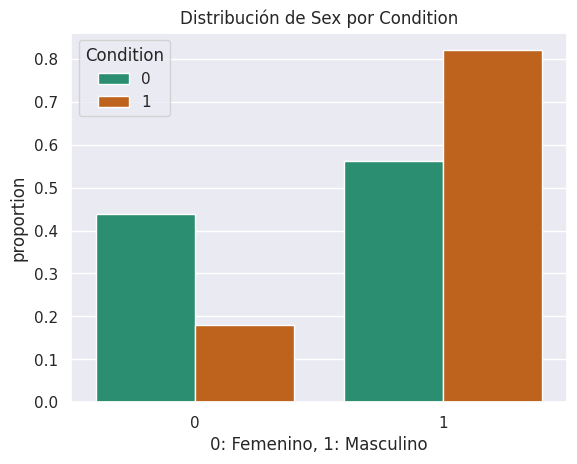

In [ ]:
# Grafico de barras comparativo para la variable 'sex' y 'condition'
# Tipo 1: Como esta repartida cada condicion por sexo
# ==============================================================================
comparative_barplot(data = df, column = 'Sex', xlabel = '0: Femenino, 1: Masculino', normalize=True)

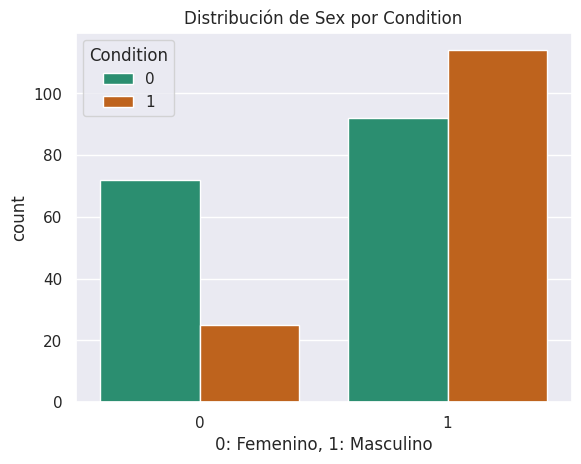

In [ ]:
# Grafico de barras comparativo para la variable 'sex' y 'condition'
# Tipo 2: Como esta distribuida cada condicion al interio de cada sexo
# ==============================================================================
comparative_barplot(data = df, column = 'Sex', xlabel = '0: Femenino, 1: Masculino', normalize=False)

### 4-3. Factores de riesgos para desarrollar enfermedades cardiacas  
[Factores de riesgos para desarrollar enfermedades cardiacas ](https://www.cdc.gov/heartdisease/risk_factors.htm) incluyen hipertensión, diabetes, colesterol alto, obesidad, estrés, fumar, etc. Revisaremos los datos estadísticos de Fasting_bs, Resting_bp, Cholesterol, y Max_heart_rate como factores de riesgo.
  
  
#### **<font color="Coral">Factor de riesgo 1.</font>** ```Fasting_bs``` : Azúcar en sangre en ayunas (sobre 120 mg/dl)  
Desde esta característica, Fasting_bs, podemos saber si los sujetos tienen demasiado azúcar en la sangre (= glucosa en sangre) antes de las comidas o no.
Los niveles normales de azúcar en la sangre son menos de 100 mg/dl después de ayunar por al menos 8 horas. Durante el ayuno, el hígado ayuda a mantener constante el nivel de azúcar en la sangre convirtiendo la grasa y el músculo en azúcar.
El nivel de azúcar en la sangre que es mayor a 120 mg/dl durante el ayuno se denomina prediabetes o diabetes. Los niveles altos de azúcar en la sangre llevan lentamente a la disfunción de tu páncreas para liberar insulina y también endurecen los vasos sanguíneos, lo que se denomina aterosclerosis. Por lo tanto, los vasos sanguíneos pueden ser dañados por los efectos de los niveles altos de glucosa en sangre y esto puede causar enfermedades cardíacas, enfermedades renales, accidentes cerebrovasculares y más. ([link](https://www.webmd.com/diabetes/how-sugar-affects-diabetes)).  

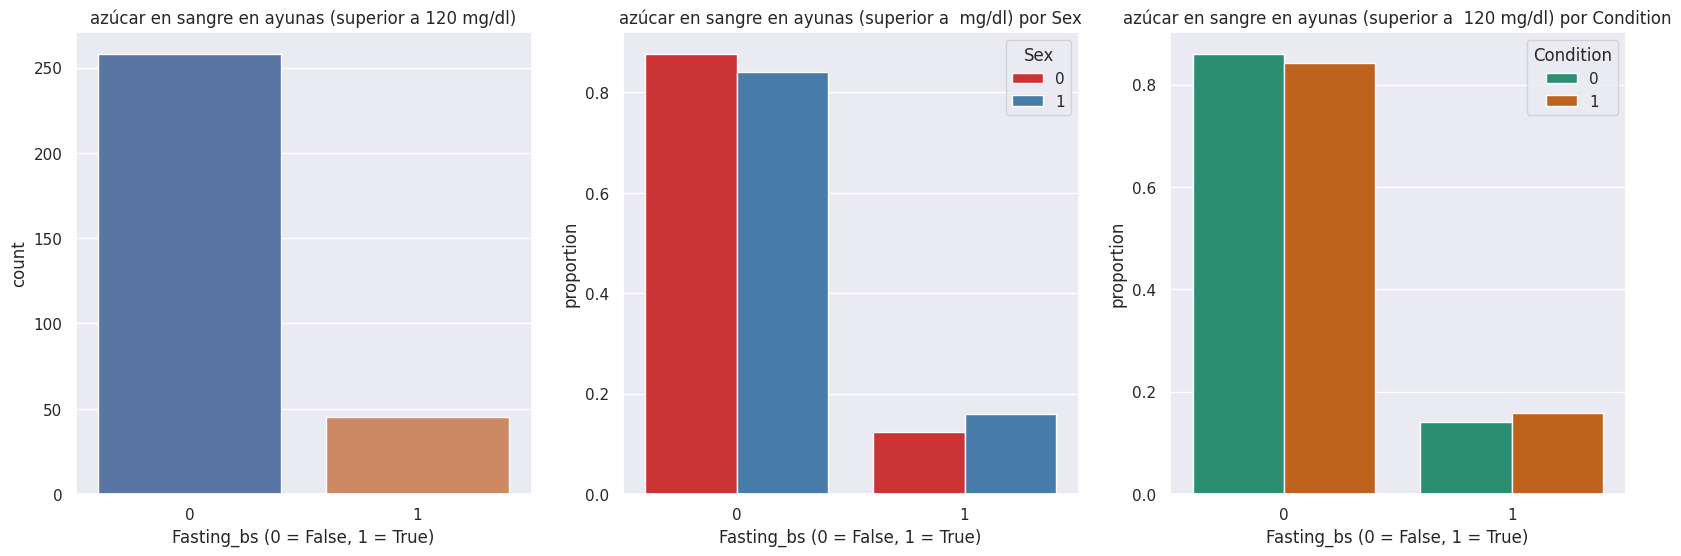

In [ ]:
# ==============================================================================
def risk_factors_fbs(data):
    fig = plt.figure(figsize=(20, 6))

    # azúcar en sangre en ayunas > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x='Fasting_bs', data=data)
    plt.title('azúcar en sangre en ayunas (superior a 120 mg/dl)')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # azúcar en sangre en ayunas por Sex
    plt.subplot(1, 3, 2)
    df['Fasting_bs'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Sex', palette='Set1')
    plt.title('azúcar en sangre en ayunas (superior a  mg/dl) por Sex')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')


    # azúcar en sangre en ayunas por Condition
    plt.subplot(1, 3, 3)
    df['Fasting_bs'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting_bs', y='proportion', hue='Condition', palette='Dark2')
    plt.title('azúcar en sangre en ayunas (superior a  120 mg/dl) por Condition')
    plt.xlabel('Fasting_bs (0 = False, 1 = True)')
    plt.show()


risk_factors_fbs(df)

#### **Observaciones**
* La cantidad de Falsos en Fasting_bs es cinco veces mayor que la de Verdaderos. Esto significa que la mayoría de los sujetos no tienen más de 120 mg/dl de nivel de azúcar en sangre en ayunas.
* Tanto <font color="Red">Femenino</font> como <font color="MediumBlue">Masculino</font> en su mayoría tienen un nivel saludable de azúcar en sangre en ayunas, pero <font color="MediumBlue">Masculino</font> es más propenso a tener más de 120 mg/dl de nivel de azúcar en sangre que <font color="Red">Femenino</font>.
* En cuanto a la relación entre el nivel de azúcar en sangre en ayunas y la Condición, sorprendentemente, las personas que tienen un nivel saludable de azúcar en sangre tienen tumores <font color="Coral">Malignos</font> más que las personas que tienen demasiado azúcar en sangre en ayunas.

#### **<font color="Coral">Factor de riesgo 2.</font>** ```Resting_bp``` : presión arterial en reposo (mmHg)
Existen cinco rangos de presión arterial, Normal, Elevada, Hipertensión Etapa 1, Hipertensión Etapa 2 y Crisis Hipertensiva, según la American Heart Association. El rango normal de la presión arterial es menor a 120 mmHg. Sin embargo, si el nivel de presión arterial es superior a 130 mmHg, se categoriza como Etapas de Hipertensión. A continuación se muestra una tabla con los rangos de presión arterial. ([link](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)).
![Blood Pressure Ranges](https://www.heart.org/-/media/health-topics-images/hbp/blood-pressure-readings-chart-english.jpg?la=en)
#### **<font color="Coral">Factor de riesgo 3.</font>** ```Cholesterol```: Colesterol sérico (mg/dL)
El colesterol es un tipo de grasa. Se desplaza a través de tu flujo sanguíneo. El colesterol sérico consiste en lipoproteínas de baja densidad (LDL, colesterol 'dañino'), lipoproteínas de alta densidad (HDL, colesterol 'inofensivo') y triglicéridos. Es importante medir el colesterol sérico para evaluar el riesgo de desarrollar enfermedades cardíacas ya que el LDL acumulado en tus vasos sanguíneos puede bloquear el flujo sanguíneo. Para ambos, mujeres y hombres de 20 años en adelante, el rango normal de colesterol sérico es de 125-200 mg/dL. ([link](https://www.medicalnewstoday.com/articles/321519#what-is-serum-cholesterol)).
#### **<font color="Coral">Factor de riesgo 4.</font>** ```Max_heart_rate```: Frecuencia cardíaca máxima alcanzada (bpm)
La mayoría de los adultos que tienen una frecuencia cardíaca en reposo normal se encuentran entre 60 y 100 latidos por minuto (lpm). La frecuencia cardíaca máxima varía según la edad. Tu frecuencia cardíaca máxima se calcula mediante la fórmula aproximadamente 220 menos tu edad. Por ejemplo, para 20 años, la frecuencia cardíaca máxima promedio es de 200 lpm y para 70 años, es de 150 lpm.
([link](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)).

Deberíamos examinar la relación entre la frecuencia cardíaca máxima y la edad porque la frecuencia cardíaca varía dependiendo de la edad.

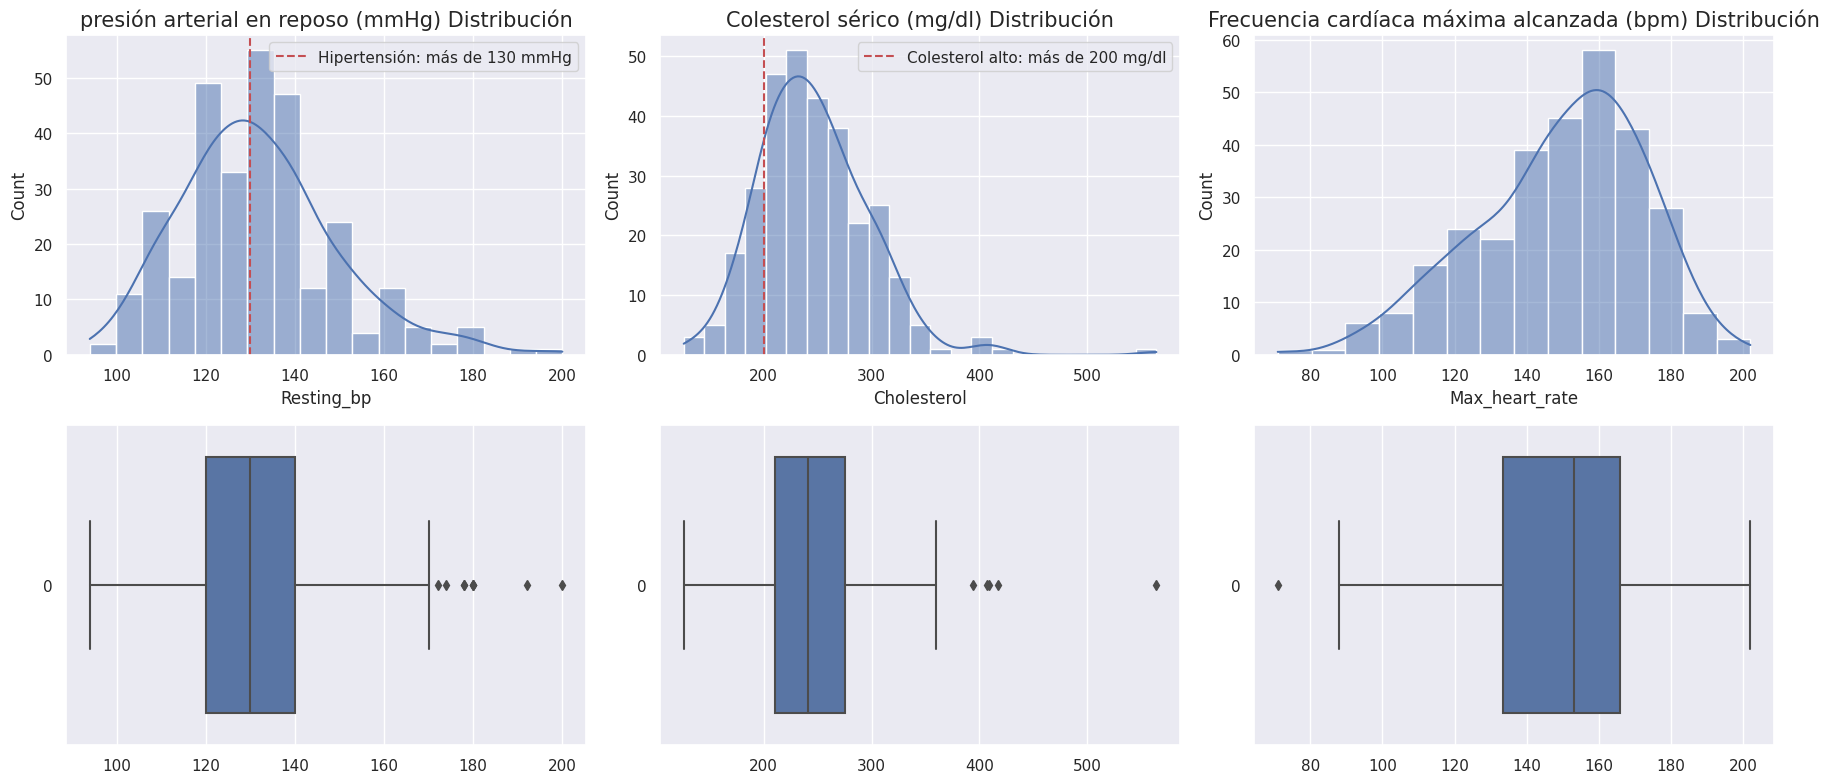

In [ ]:
# ==============================================================================
def risk_factors_dist(data):
    fig = plt.figure(figsize=(18, 8))

    # presión arterial en reposo
    plt.subplot(2, 3, 1)
    sns.histplot(data['Resting_bp'], kde=True)
    plt.title('presión arterial en reposo (mmHg) Distribución', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hipertensión: más de 130 mmHg')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Resting_bp'], orient='h')

    # Colesterol sérico
    plt.subplot(2, 3, 2)
    sns.histplot(data['Cholesterol'], kde=True)
    plt.title('Colesterol sérico (mg/dl) Distribución', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='Colesterol alto: más de 200 mg/dl')
    plt.legend()

    plt.subplot(2, 3, 5)
    sns.boxplot(data['Cholesterol'], orient='h')

    # Frecuencia cardíaca máxima alcanzada
    plt.subplot(2, 3, 3)
    sns.histplot(data['Max_heart_rate'], kde=True)
    plt.title('Frecuencia cardíaca máxima alcanzada (bpm) Distribución', fontsize=15)

    plt.subplot(2, 3, 6)
    sns.boxplot(data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()

risk_factors_dist(df);

In [ ]:
# ==============================================================================
def risk_factors_dist_stats(data):

    # Calcula las estadísticas
    stats_df = data[['Resting_bp', 'Cholesterol', 'Max_heart_rate']].describe().T
    stats_df['skew'] = data[['Resting_bp', 'Cholesterol', 'Max_heart_rate']].skew()
    stats_df['kurt'] = data[['Resting_bp', 'Cholesterol', 'Max_heart_rate']].kurt()

    return stats_df

risk_factors_dist_stats(df)

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Resting_bp,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0,0.706035,0.880074
Cholesterol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0,1.135503,4.491724
Max_heart_rate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0,-0.537449,-0.053541


#### **Observations**
* Tanto Resting_bp como Cholesterol presentan una distribución ligeramente sesgada hacia la derecha.  ([link](http://ri.uaemex.mx/bitstream/handle/20.500.11799/32032/secme-21228.pdf?sequence=1&isAllowed=y))

* Podemos ver algunos valores atípicos en los diagramas de caja mostrados anteriormente. Especialmente, Cholesterol tiene un valor atípico extremo.

* Max_heart_rate presenta una distribución más sesgada hacia la izquierda.

* La mayoría de la presión arterial en reposo se distribuye alrededor de más o menos 130 mmHg.

* La media del colesterol sérico cae en el nivel de colesterol alto.

* En la distribución de Max_heart_rate, podemos ver que algunos individuos tienen una frecuencia cardíaca máxima muy baja, aunque entre 150 a 200 lpm es la frecuencia cardíaca máxima promedio para adultos.

#### ```Resting_bp```, ```Cholesterol```, y ```Max_heart_rate``` **vs.** ```Sex```

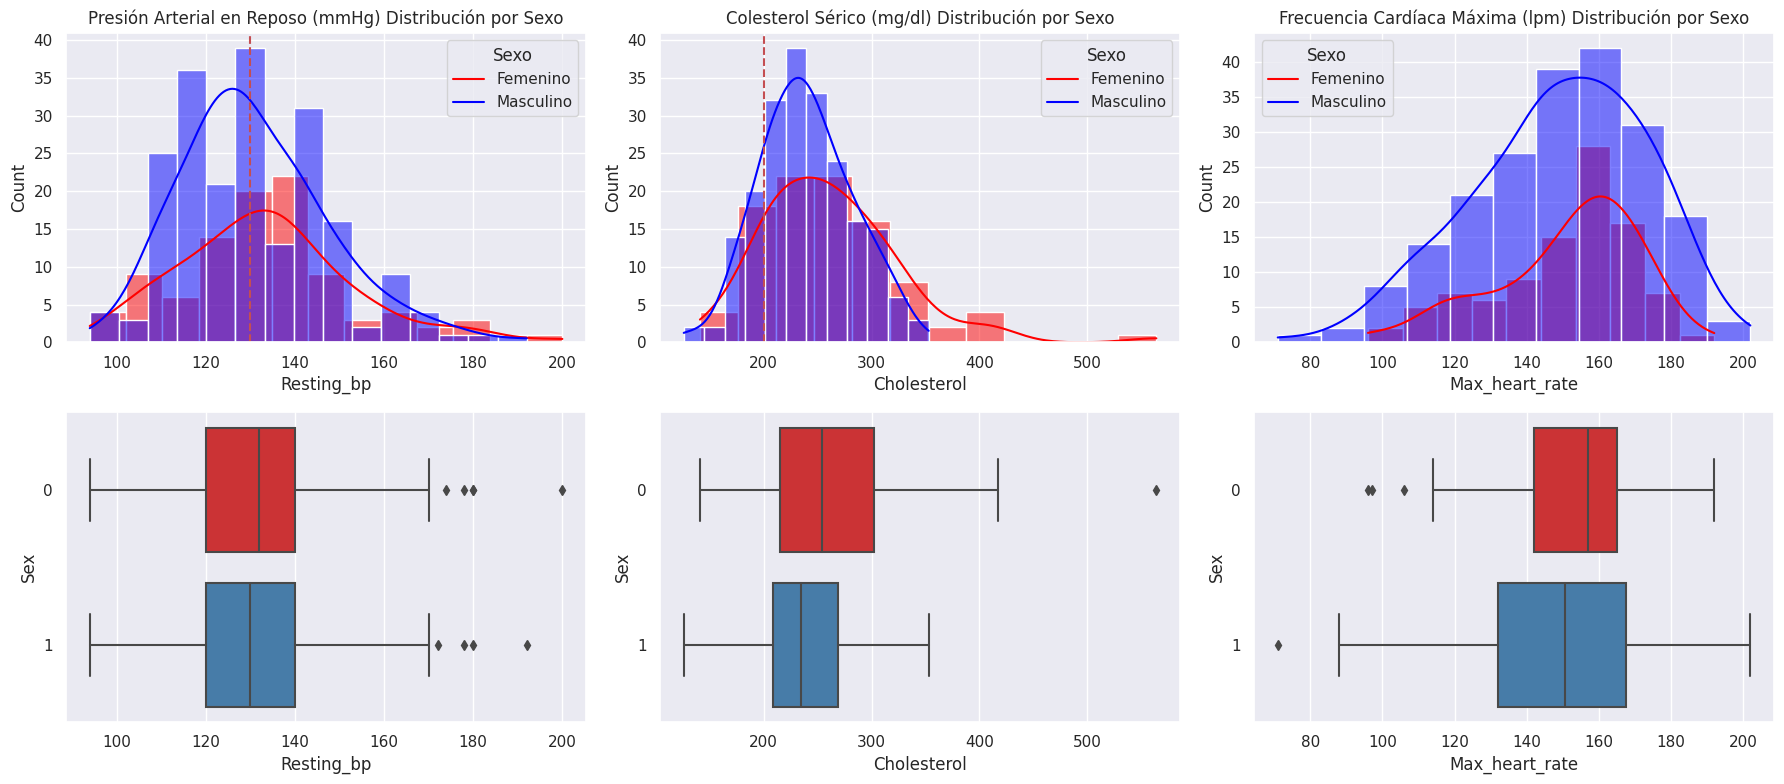

In [ ]:
# ==============================================================================
def risk_factors_dist_sex(data):
    fig = plt.figure(figsize=(18, 8))

    # presión arterial en reposo por cada sexo
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['Resting_bp']
    trestbps_male = data[data['Sex']==1]['Resting_bp']
    sns.histplot(trestbps_female, color='Red', kde=True)
    sns.histplot(trestbps_male, color='Blue', kde=True)
    plt.title('Presión Arterial en Reposo (mmHg) Distribución por Sexo')
    plt.gca().legend(title='Sexo', labels=['Femenino','Masculino'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hipertensión: más de 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Sex'],
                palette='Set1', orient='h')

    # Colesterol sérico por cada sexo
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholesterol']
    chol_male = data[data['Sex']==1]['Cholesterol']
    sns.histplot(chol_female, color='Red', kde=True)
    sns.histplot(chol_male, color='Blue', kde=True)
    plt.title('Colesterol Sérico (mg/dl) Distribución por Sexo')
    plt.gca().legend(title='Sexo', labels=['Femenino','Masculino'])
    plt.axvline(x=200, color='r', linestyle='--', label='Colesterol alto: más de 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Sex'],
                palette='Set1', orient='h')

    # Frecuencia cardíaca máxima alcanzada por cada sexo
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['Max_heart_rate']
    thalach_male = data[data['Sex']==1]['Max_heart_rate']
    sns.histplot(thalach_female, color='Red', kde=True)
    sns.histplot(thalach_male, color='Blue', kde=True)
    plt.title('Frecuencia Cardíaca Máxima (lpm) Distribución por Sexo')
    plt.gca().legend(title='Sexo', labels=['Femenino','Masculino'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Sex'],
                palette='Set1', orient='h')

    plt.tight_layout()
    plt.show()

# Suponiendo que df es tu DataFrame
risk_factors_dist_sex(df);

#### **Observaciones**

* La mayoría de <font color="Red">Femenino</font> están ligeramente distribuidas en el rango de más de 130 mmHg en comparación con <font color="MediumBlue">Masculino</font>.
* Los niveles de colesterol tanto de <font color="MediumBlue">Masculino</font> como de <font color="Red">Femenino</font> presentan distribuciones sesgadas a la derecha, pero <font color="Red">Femenino</font> tienen más probabilidades de tener niveles extremos de colesterol.
* <font color="MediumBlue">Masculino</font> y <font color="Red">Femenino</font> muestran distribuciones sesgadas a la izquierda y la mayoría de las poblaciones se ubican entre 150 a 200 lpm, que es la frecuencia cardíaca máxima promedio. Sin embargo, ambos sexos tienen varios valores atípicos que indican una frecuencia cardíaca máxima demasiado baja.

#### ```Resting_bp```, ```cholesterol```, ```Max_heart_rate``` **vs.** ```Condition```

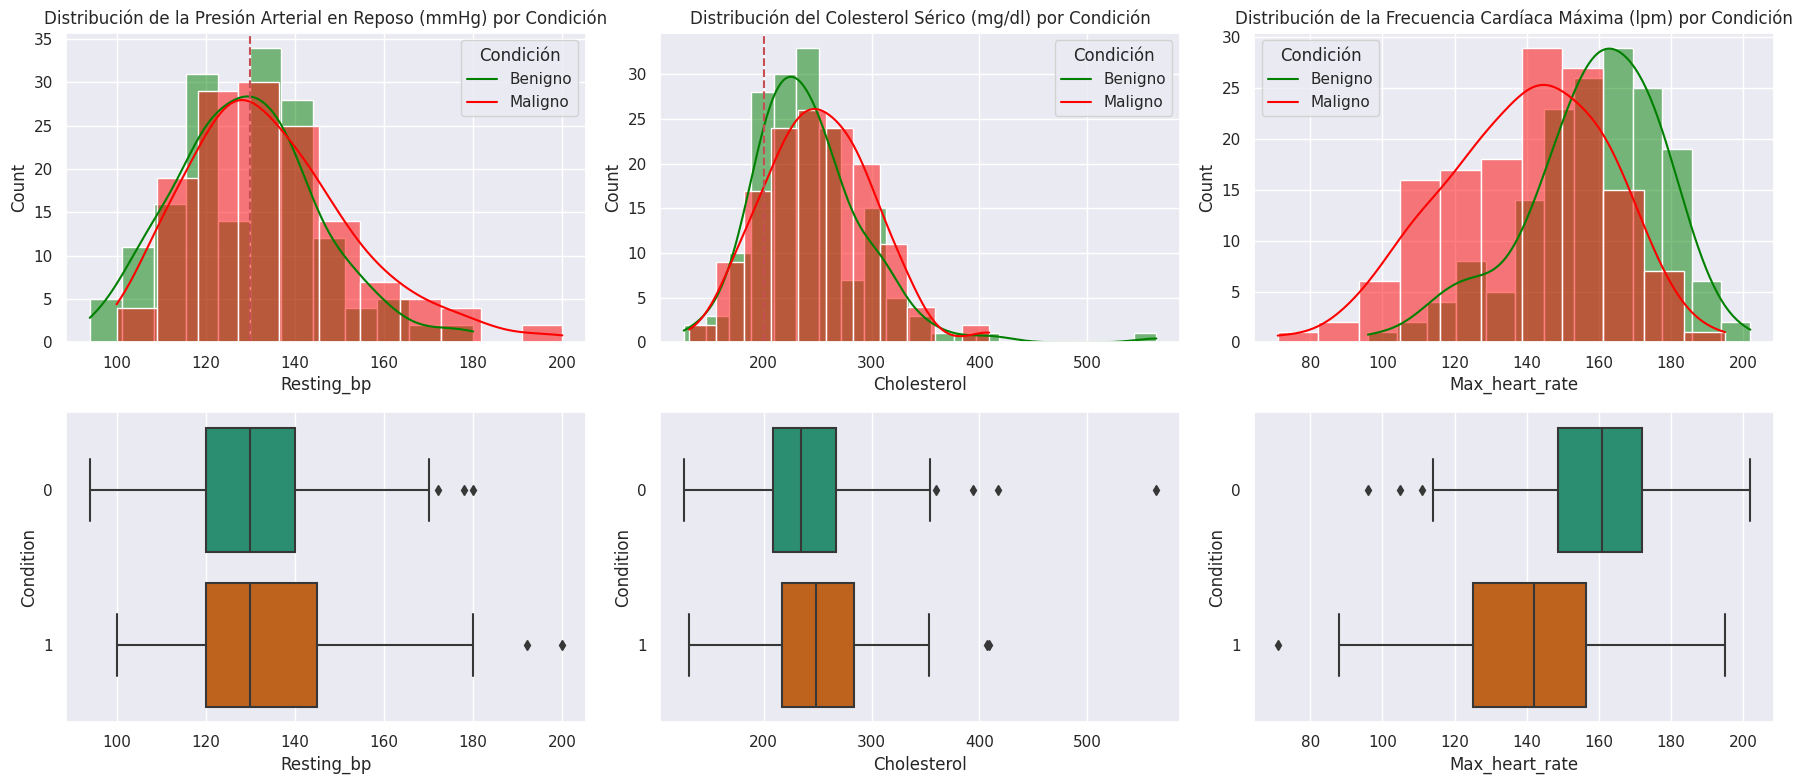

In [ ]:
# ==============================================================================
def risk_factors_dist_condition(data):
    fig = plt.figure(figsize=(18, 8))

    # Distribución de la presión arterial en reposo para cada condición
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['Resting_bp']
    trestbps_m = data[data['Condition']==1]['Resting_bp']
    sns.histplot(trestbps_b, color='Green', kde=True)
    sns.histplot(trestbps_m, color='Red', kde=True)
    plt.title('Distribución de la Presión Arterial en Reposo (mmHg) por Condición')
    plt.gca().legend(title='Condición', labels=['Benigno','Maligno'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hipertensión: más de 130 mmHg')

    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['Resting_bp'], y=data['Condition'],
                orient='h', palette='Dark2')

    # Distribución del colesterol sérico para cada condición
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholesterol']
    chol_m = data[data['Condition']==1]['Cholesterol']
    sns.histplot(chol_b, color='Green', kde=True)
    sns.histplot(chol_m, color='Red', kde=True)
    plt.title('Distribución del Colesterol Sérico (mg/dl) por Condición')
    plt.gca().legend(title='Condición', labels=['Benigno','Maligno'])
    plt.axvline(x=200, color='r', linestyle='--', label='Colesterol alto: más de 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], y=data['Condition'],
                orient='h', palette='Dark2')

    # Distribución de la frecuencia cardíaca máxima alcanzada para cada condición
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['Max_heart_rate']
    thalach_m = data[data['Condition']==1]['Max_heart_rate']
    sns.histplot(thalach_b, color='Green', kde=True)
    sns.histplot(thalach_m, color='Red', kde=True)
    plt.title('Distribución de la Frecuencia Cardíaca Máxima (lpm) por Condición')
    plt.gca().legend(title='Condición', labels=['Benigno','Maligno'])

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], y=data['Condition'],
                orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()

risk_factors_dist_condition(df);

#### **Observaciones**  
* Tanto las condiciones <font color="Green">Benigno</font> como <font color="Coral">Maligno</font> se distribuyen principalmente alrededor de 130 mmHg. No parece que la condición <font color="Coral">Maligno</font> tienda a tener una presión arterial en reposo más alta, ya que la condición <font color="Green">Benigno</font> tiene una presión arterial en reposo más alta que <font color="Coral">Maligno</font>.

* A pesar de que la mayoría de las condiciones <font color="Green">Benigno</font> y <font color="Coral">Maligno</font> muestran valores de colesterol saludables, la condición <font color="Coral">Maligno</font> tiene más probabilidades de tener niveles elevados de colesterol sérico.

### 4-4. Síntomas de la Enfermedad Cardíaca
En este conjunto de datos, ```Chest_pain_type``` and ```Exercise_induced_angina``` contributes to symptoms of heart disease. ```Chest_pain_type``` reveals what kind of chest pain type the subjects have and```Exercise_induced_angina``` indican la presencia de angina causa por actividad fisica.

[*Angina*](https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain#:~:text=Angina%20is%20chest%20pain%20or,neck%2C%20jaw%2C%20or%20back.) Es un tipo de dolor en el pecho causado por la falta de oxígeno suficiente en el flujo sanguíneo hacia el corazón. Puede hacer que sientas presión o compresión en el pecho. Este dolor en el pecho en sí no es una enfermedad, sino un síntoma de insuficiencia cardíaca, llamada enfermedad coronaria (EC).

<font color="Coral">Síntoma 1.</font> ```Chest_pain_type```
Dolor de pecho es un síntoma importante de enfermedad cardiovascular. Algunas personas tienen un ataque al corazón sin dolor en el pecho, pero pueden haber experimentado dolor en el pecho en el pasado, en forma de enfermedad cardiovascular. Aquí están los valores de ```Chest_pain_type```  a continuación:


   * Value 1: Angina típica, la angina típica también se conoce como angina estable, el tipo más común de angina. Esto se debe a la actividad física o el estrés emocional.
   * Value 2: Angina atípica, la angina atípica también se conoce como angina inestable. Este dolor en el pecho ocurre repentinamente y empeora con el tiempo. Se debe a la presencia de una placa en los vasos sanguíneos.
   * Value 3: Dolor no anginoso, lste tipo de dolor en el pecho no es causado por enfermedades cardíacas o un ataque al corazón. En la mayoría de los casos, se asocia con problemas en el esófago.
   * Value 4: Asintomático, este infarto de miocardio silencioso se conoce como infarto de miocardio silencioso (IMS). No es como el dolor en el pecho clásico. El IMS es un dolor leve y no siempre ocurre en el lado izquierdo del pecho. Las personas que experimentan este tipo de dolor en el pecho suelen no darse cuenta de su condición, pero es un síntoma muy peligroso de enfermedad cardíaca.


<font color="Coral">Síntoma 2.</font> ```Exercise_induced_angina```
La angina inducida por el ejercicio es un tipo de angina. Cuando subes escaleras, caminas o haces ejercicio, tu corazón necesita más flujo sanguíneo. Esto hace que tu corazón tenga falta de oxígeno y luego provoca dolor en el pecho. Esto se llama típicamente [*stable angina*](https://www.healthline.com/health/stable-angina#:~:text=Angina%20is%20a%20type%20of,most%20common%20type%20of%20angina.).

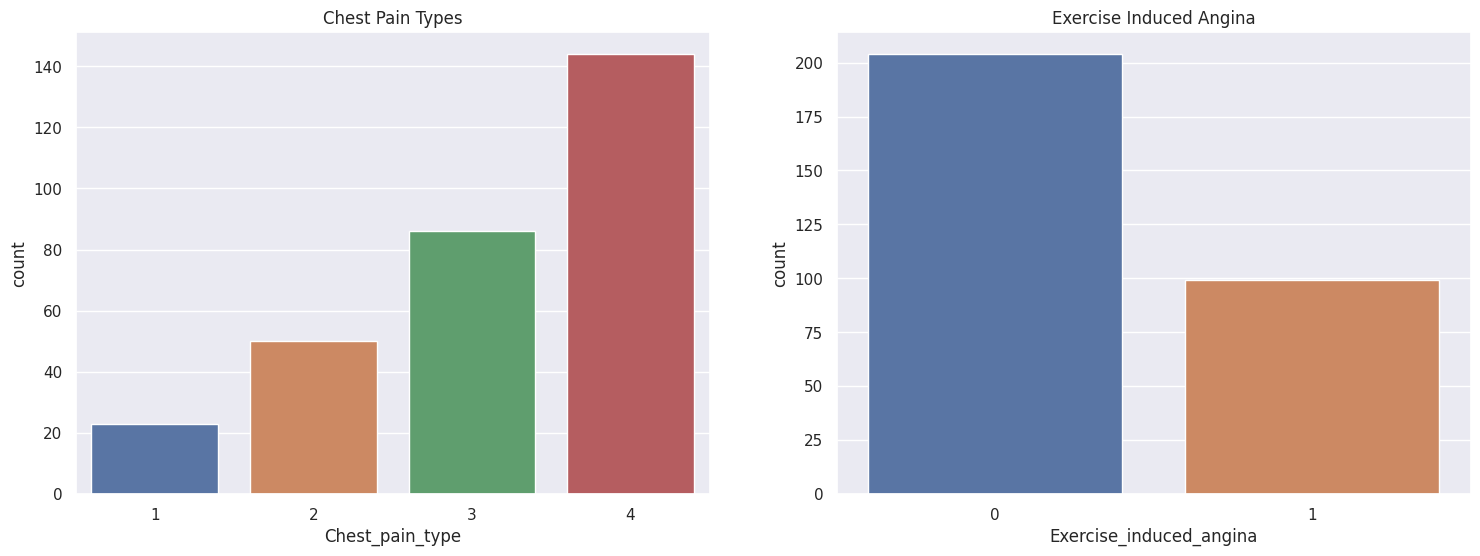

In [ ]:
# ==============================================================================
def symptoms_features(data):
    plt.figure(figsize=(18, 6))

    # Tipo de dolor en el pecho
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')


    # angina inducida
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')


symptoms_features(df);

#### **Observaciones**  

```Chest_pain_type```  
* La mayoría de los tipos de dolor de pecho son asitonamticos (= 4).
 Angina tipica (= 1) es el número más bajo.


```Exercise_induced_angina```
* El número de personas que experimentan angina inducida por el ejercicio (= 1) es la mitad de las que no la tienen (= 0).

* El valor de la característica Tener angina inducida por el ejercicio (= 1) en ```Exercise_induced_angina```  puede incluirse como Angina típica (= 0) en Tipo_de_dolor_de_pecho, ya que, como mencionamos anteriormente, Angina típica es uno de los tipos de angina mencionados anteriormente.

#### ```Chest_pain_type``` y ```Exercise_induced_angine``` *vs.* ```Sex```

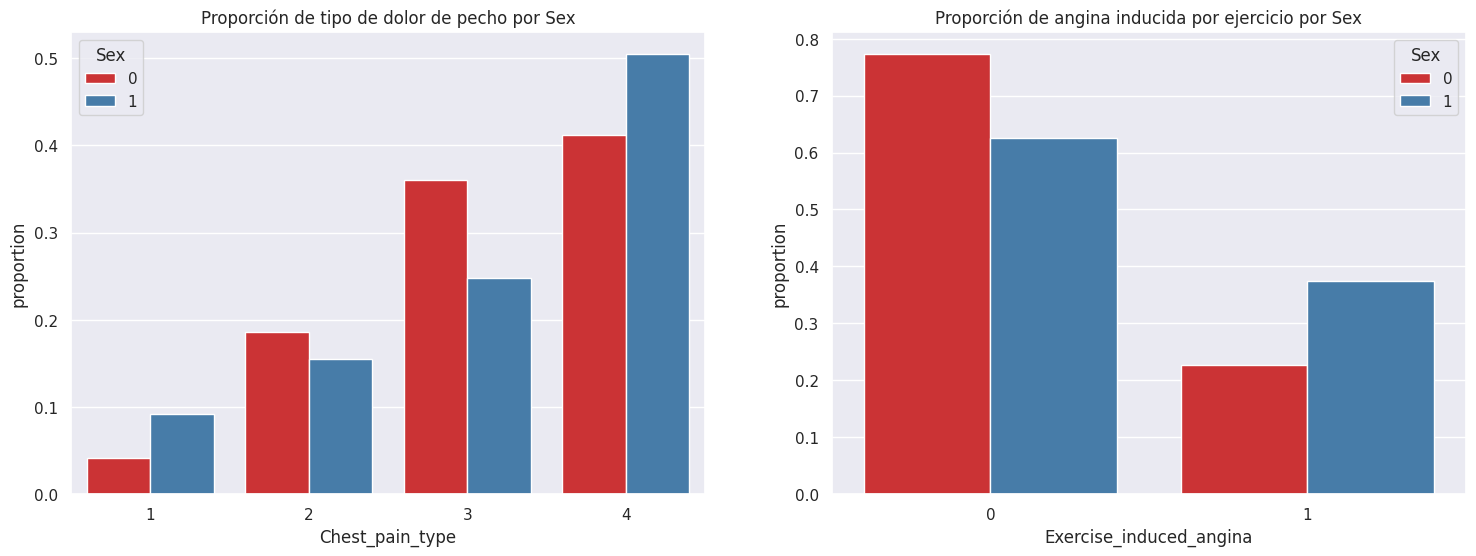

In [ ]:
# ==============================================================================
def symptoms_features_sex(data):

    fig = plt.figure(figsize=(18, 6))

    # Tipo de dolor en el pecho por Sex
    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proporción de tipo de dolor de pecho por Sex')


    # Angina inducida por ejercicio por Sex
    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proporción de angina inducida por ejercicio por Sex')
    plt.show()


symptoms_features_sex(df);

#### ```Chest_pain_type``` y ```Exercise_induced_angine``` *vs.* ```Condition```

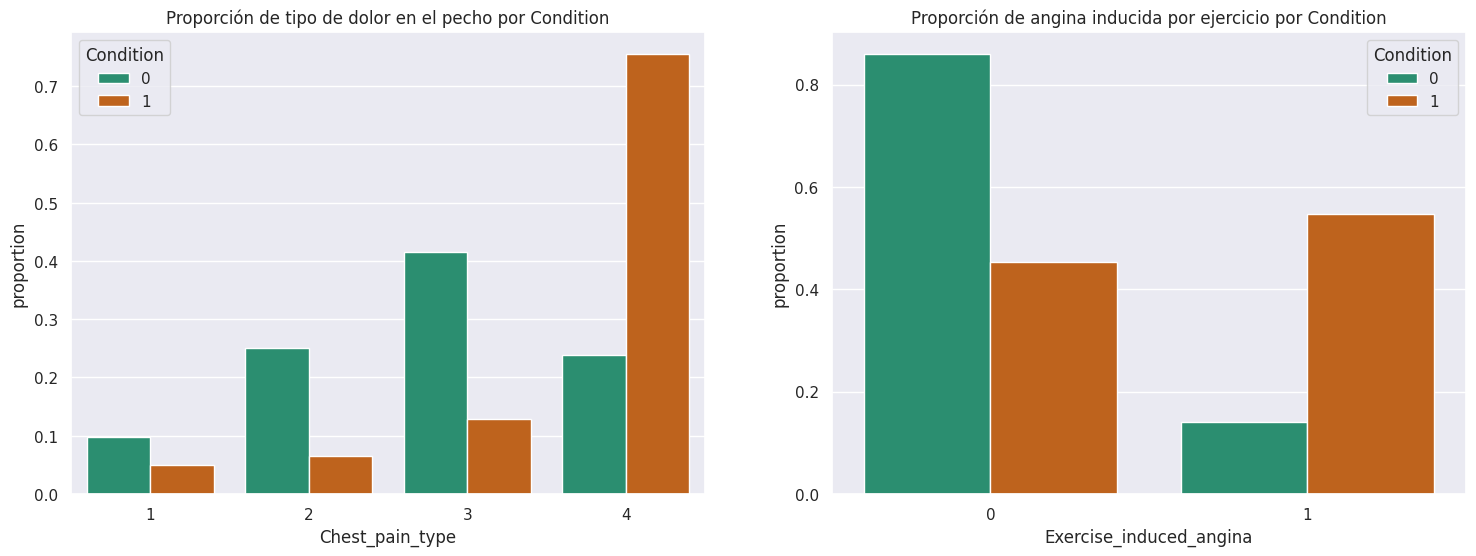

In [ ]:
# ==============================================================================
def symptoms_features_condition(data):
    fig = plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    data['Chest_pain_type'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest_pain_type', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proporción de tipo de dolor en el pecho por Condition')

    plt.subplot(1, 2, 2)
    data['Exercise_induced_angina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise_induced_angina', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proporción de angina inducida por ejercicio por Condition')
    plt.show()


symptoms_features_condition(df);

#### **Observaciones**  
```Chest_pain_type```  
*

```Exercise_induced_angina```  
*

## 4-5. Funciones Cardíacas para Enfermedades Cardíacas

Para verificar las funciones del corazón, existen varios exámenes como la electrocardiografía (ECG), la fluoroscopia y la prueba de esfuerzo con talio. Exploraremos cómo están relacionadas las funciones cardíacas con las enfermedades cardíacas.

#### **<font color="Coral">Funcion Cardíaca 1.</font>** ```Resting_ecg```: Resting electrocardiographic results  
[Electrocardiography (ECG)](https://www.mayoclinic.org/tests-procedures/ekg/about/pac-20384983) La electrocardiografía (ECG) es una prueba para evaluar la frecuencia y el ritmo cardíaco. Esta prueba puede detectar enfermedades cardíacas, ataques cardíacos, agrandamiento del corazón y ritmos cardíacos anormales.


   * 0 = Normal
   * 1 = Onda ST-T anormal
   * 2 = Muestra hipertrofia ventricular izquierda probable o definitiva [Left Ventricular Hypertrophy (LVH)](https://www.heart.org/en/health-topics/heart-valve-problems-and-disease/heart-valve-problems-and-causes/what-is-left-ventricular-hypertrophy-lvh#:~:text=Left%20ventricular%20hypertrophy%2C%20or%20LVH,pressure%20overwork%20the%20heart%20muscle.)
        
           

![ECG](https://upload.wikimedia.org/wikipedia/commons/5/53/SinusRhythmLabels.png)

#### **<font color="Coral">Funcion Cardíaca 2.</font>** ```ST_slope```: La pendiente del segmento ST en el ejercicio máximo

   * 1 = Ascendente
   * 2 = Horizontal
   * 3 = Descendente

![ST-segment Depression](https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png)

La depresión del segmento ST horizontal y descendente de más de 0.5 mm indica isquemia miocárdica, un flujo sanguíneo reducido hacia el músculo cardíaco en una arteria coronaria.

Por otro lado, la depresión del segmento ST ascendente suele observarse durante la actividad física. ([link](https://ecgwaves.com/st-segment-normal-abnormal-depression-elevation-causes/)).

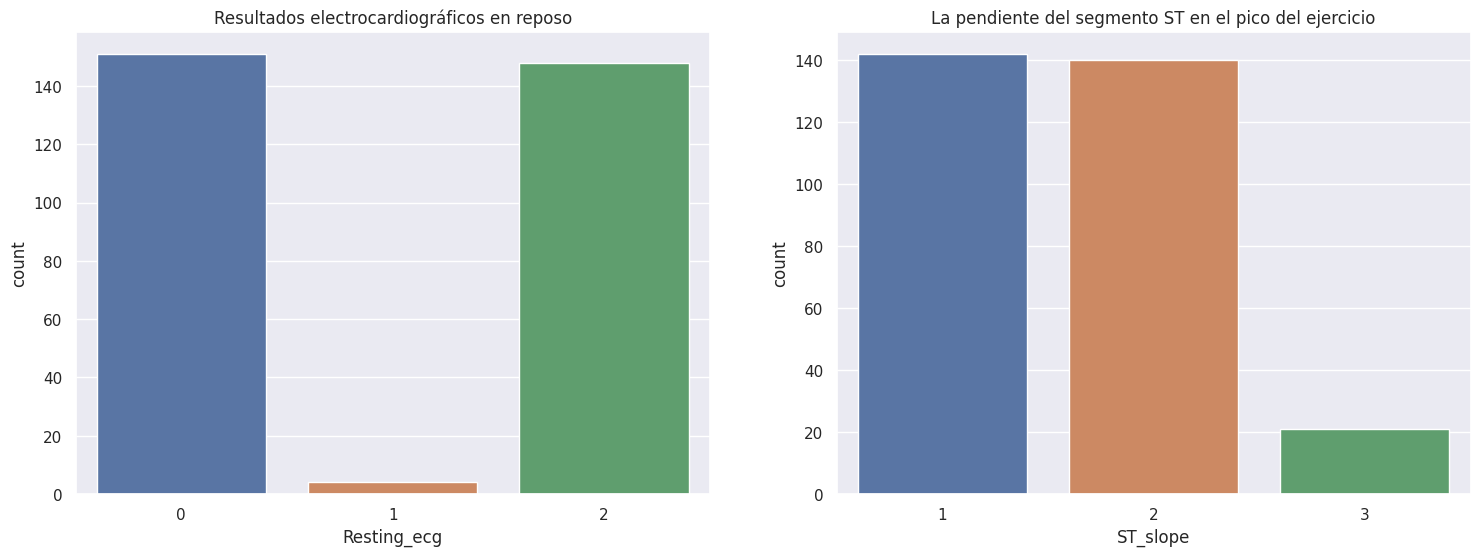

In [ ]:
# ==============================================================================
def heart_functions(data):

    plt.figure(figsize=(18, 6))

    # ECG
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resultados electrocardiográficos en reposo')

    # Pendiente
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('La pendiente del segmento ST en el pico del ejercicio')
    plt.show()


heart_functions(df);

#### **Observaciones**  
```Resting_ecg```   
Muestra una probable o definitiva hipertrofia ventricular izquierda (= 2) raramente se muestra, pero la mitad de los sujetos tiene una onda ST-T anormal (= 1).

```ST_slope```  
La mayoría de los valores de ST_slope muestran anomalías, horizontal (= 2), 140, y ascendente (= 1), más de 140.

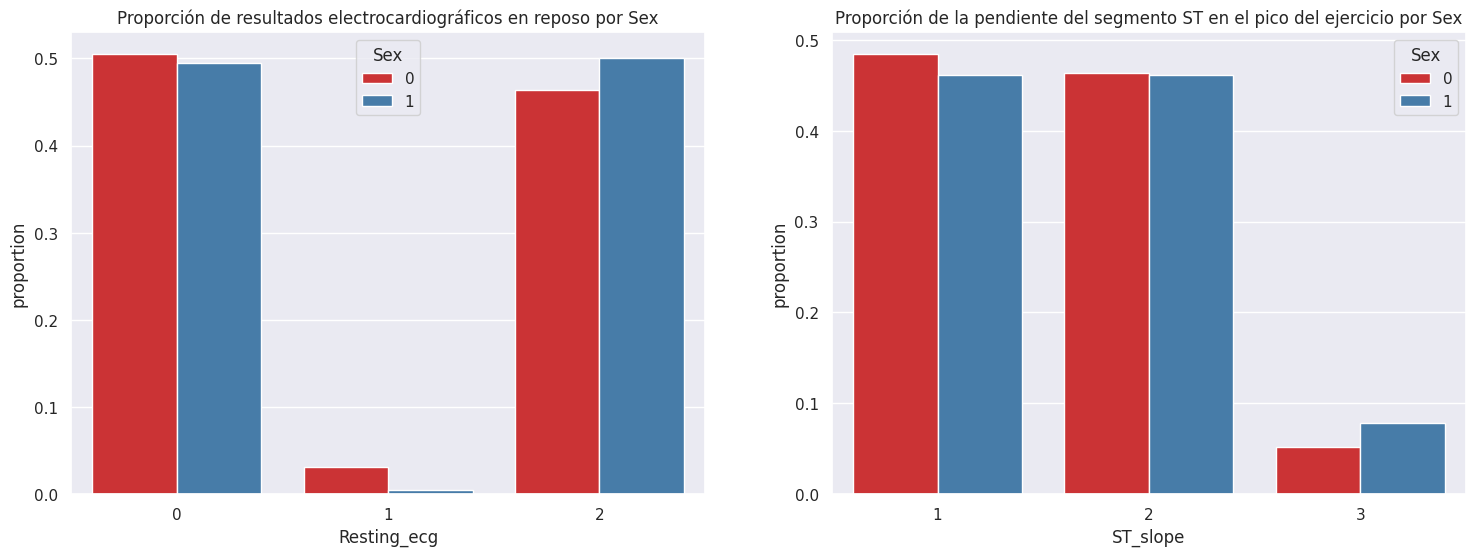

In [ ]:
# ==============================================================================
def heart_functions_sex(data):
    plt.figure(figsize=(18, 6))

    # ECG
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proporción de resultados electrocardiográficos en reposo por Sex')

    # Pendiente
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proporción de la pendiente del segmento ST en el pico del ejercicio por Sex')
    plt.show()


heart_functions_sex(df);

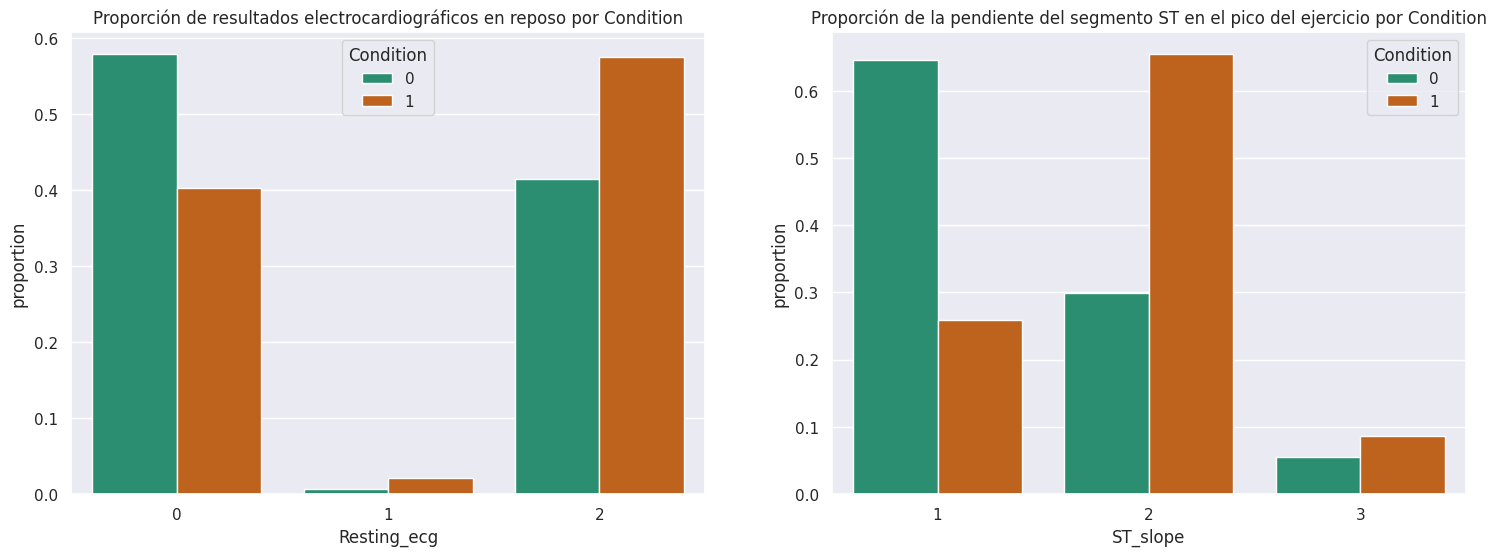

In [ ]:
# ==============================================================================
def heart_functions_condition(data):
    plt.figure(figsize=(18, 6))

    # ECG
    plt.subplot(1, 2, 1)
    data['Resting_ecg'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting_ecg', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proporción de resultados electrocardiográficos en reposo por Condition')


    # Pendiente
    plt.subplot(1, 2, 2)
    data['ST_slope'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST_slope', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proporción de la pendiente del segmento ST en el pico del ejercicio por Condition')
    plt.show()


heart_functions_condition(df);

#### **<font color="Coral">Funcion Cardíaca 3.</font>** ```ST_depression```: Depresión del segmento ST inducida por ejercicio en relación al reposo
[Normal ST-segment depression](https://en.my-ekg.com/how-read-ekg/st-segment.html) is flat or up to 0.5 mm.  

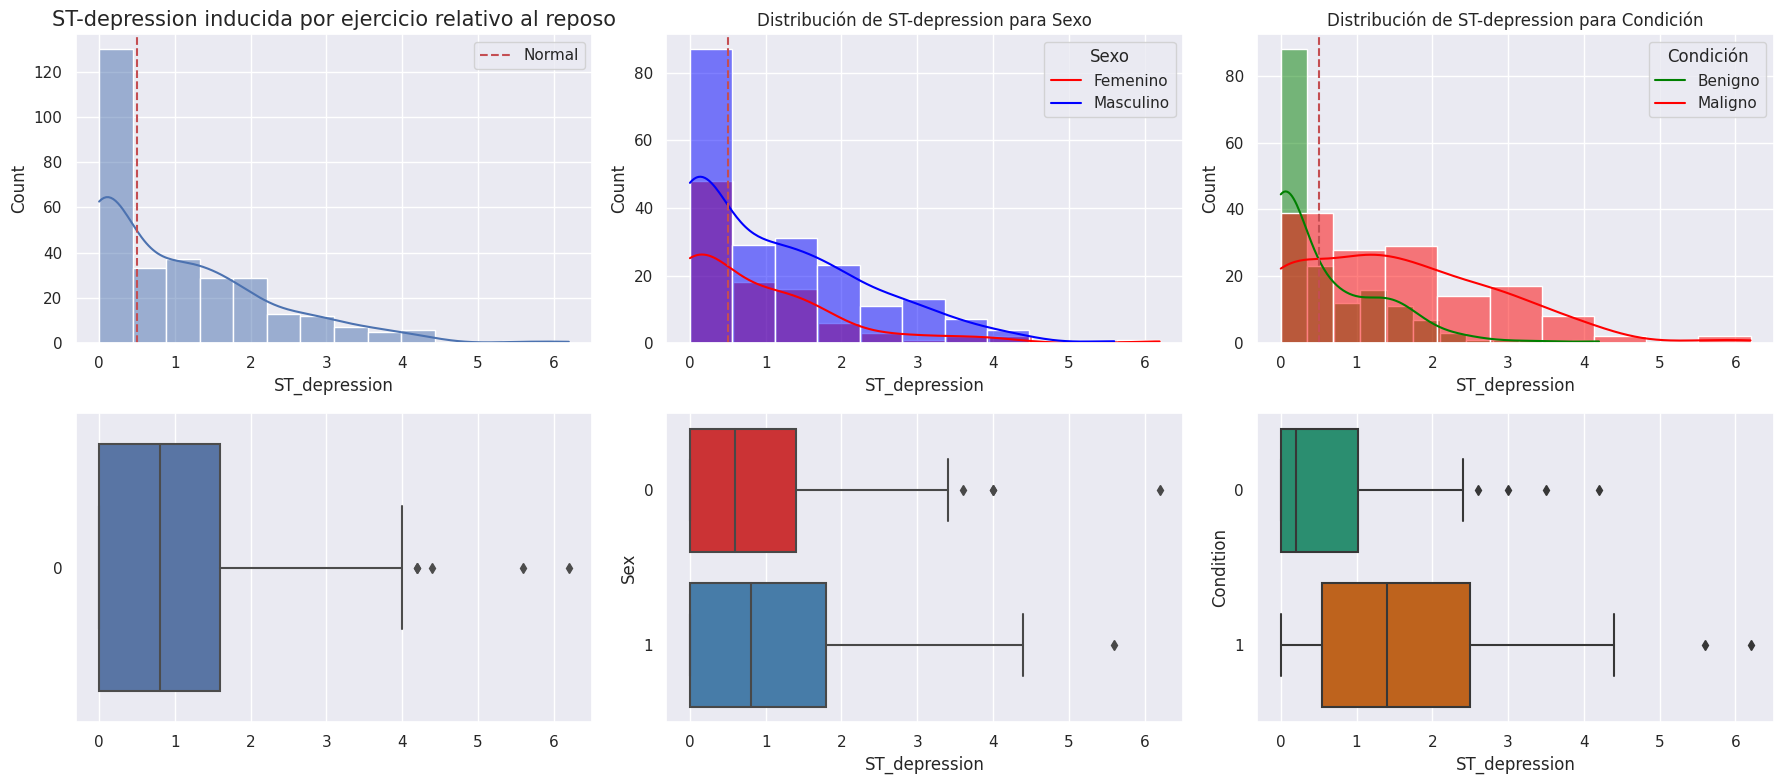

In [ ]:
# ==============================================================================
def heart_functions_sex(data):

    fig = plt.figure(figsize=(18, 8))

    # ST-depression inducida por ejercicio relativo al reposo
    plt.subplot(2, 3, 1)
    sns.histplot(data['ST_depression'], kde=True)
    plt.title('ST-depression inducida por ejercicio relativo al reposo', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()

    plt.subplot(2, 3, 4)
    sns.boxplot(data['ST_depression'], orient='h')


    # ST-depression para Sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['ST_depression']
    chol_male = data[data['Sex']==1]['ST_depression']
    sns.histplot(chol_female, color='Red', kde=True)
    sns.histplot(chol_male, color='Blue', kde=True)
    plt.title('Distribución de ST-depression para Sexo')
    plt.gca().legend(title='Sexo', labels=['Femenino','Masculino'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['ST_depression'], y=data['Sex'],
                palette='Set1', orient='h')


    # ST-depression para Condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['ST_depression']
    thalach_m = data[data['Condition']==1]['ST_depression']
    sns.histplot(thalach_b, color='Green', kde=True)
    sns.histplot(thalach_m, color='Red', kde=True)
    plt.title('Distribución de ST-depression para Condición')
    plt.gca().legend(title='Condición', labels=['Benigno','Maligno'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST_depression'], y=data['Condition'],
                palette='Dark2', orient='h')

    plt.tight_layout()
    plt.show()

# Suponiendo que df es tu DataFrame
heart_functions_sex(df);



#### **Observaciones**  

* ```ST_depression``` muestra una distribución sesgada a la derecha. La mayoría de los valores son menores que 1.
* La distribución de <font color="Red">Mujer</font> y <font color="MediumBlue">Hombre</font> es igual a la distribución total.
* <font color="Green">Benigno</font> está ampliamente distribuido. Sin embargo, <font color="Coral">Maligno</font> tiene una distribución fuertemente sesgada a la derecha y posee varios valores atípicos.

#### **<font color="Coral">Heart Functions 4.</font>** ```Num_major_vessels```: Número de vasos principales (0-3) coloreados por fluoroscopia
[Fluoroscopia](https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=92&contentid=P07662) es una herramienta de imagen para estudiar el cuerpo, como los sistemas esquelético, digestivo, urinario, respiratorio y reproductivo. La fluoroscopia ayuda a diagnosticar o tratar ciertas partes del cuerpo, incluyendo huesos, músculos y vasos cardíacos.
En este conjunto de datos, la fluoroscopia se utiliza para ayudar a ver el flujo sanguíneo a través de las arterias coronarias.

#### **<font color="Coral">Heart Functions 5.</font>** ```Thallium_test```: Thallium scintigraphy  
  * 3 = Normal
  * 6 = Defecto fijo
  * 7 = Defecto reversible


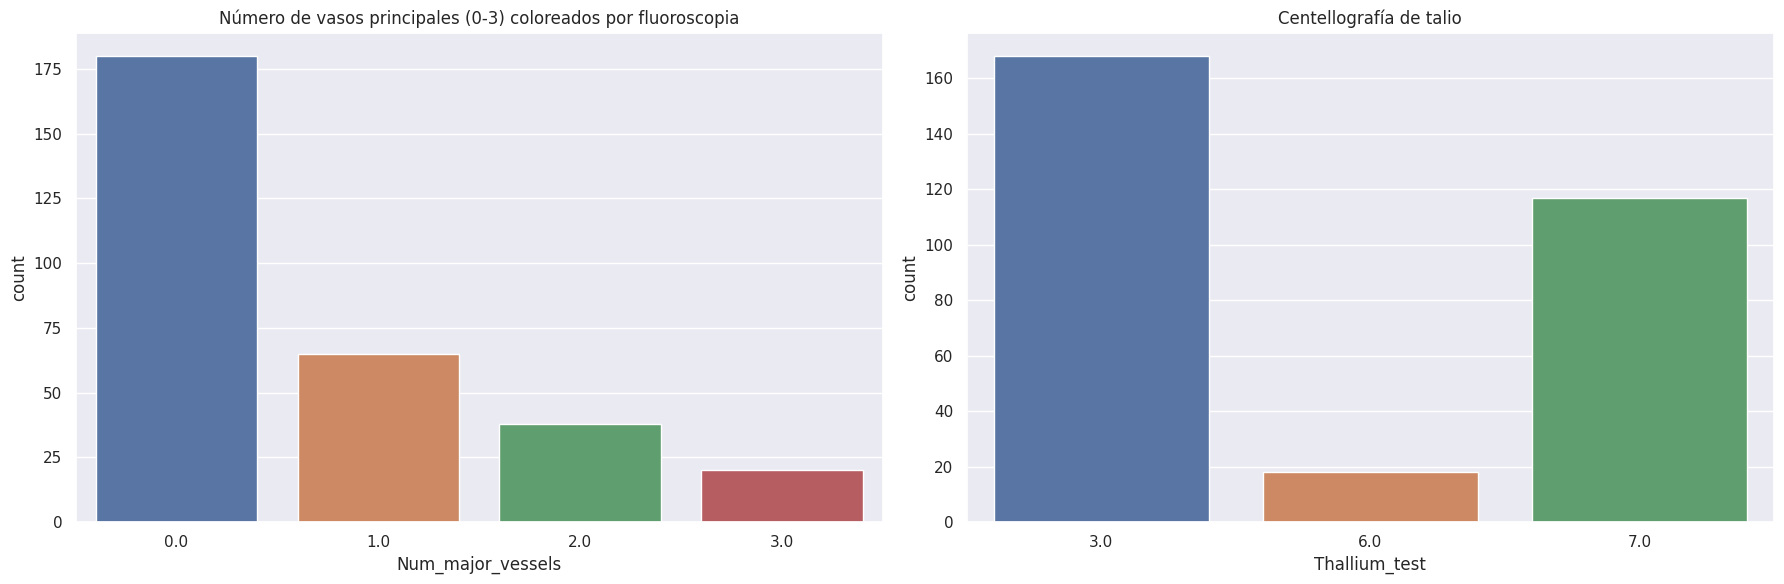

In [ ]:
def heart_functions2(data):

    fig = plt.figure(figsize=(18, 6))

    # Fluoroscopia
    plt.subplot(1, 2, 1)
    sns.countplot(x='Num_major_vessels', data=data)
    plt.title('Número de vasos principales (0-3) coloreados por fluoroscopia')

    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thallium_test', data=data)
    plt.title('Centellografía de talio')

    plt.tight_layout()
    plt.show()


heart_functions2(df);

#### ```Num_major_vessels``` y ```Thallium_test``` vs. ```Sex```

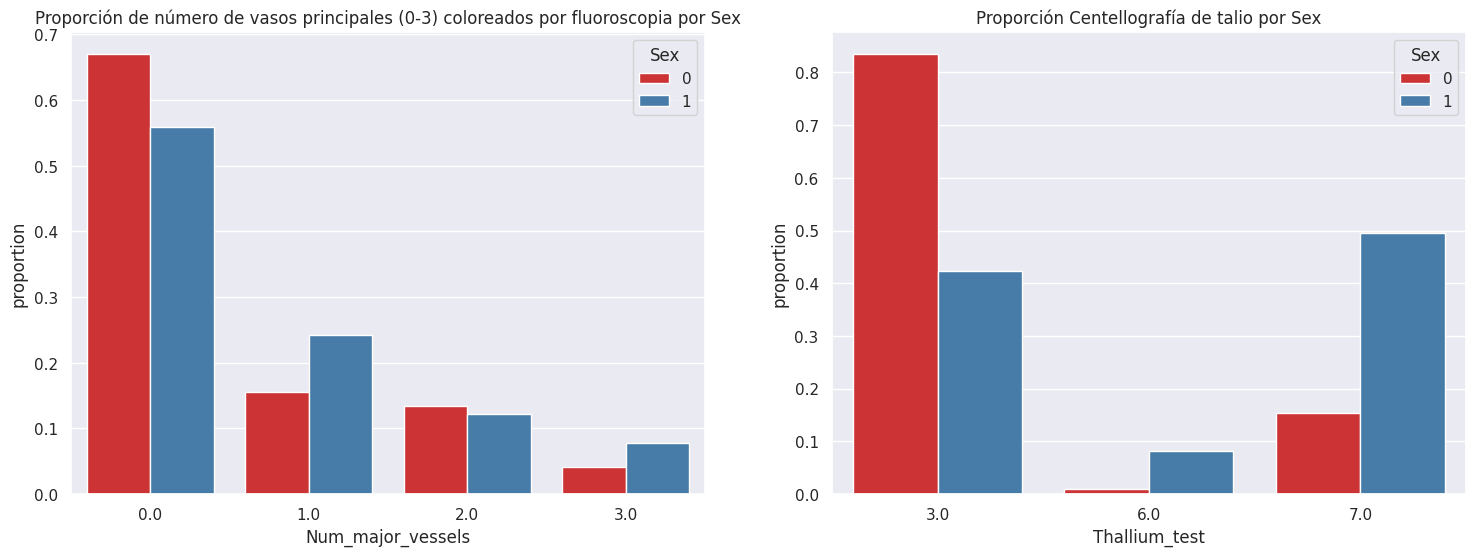

In [ ]:
def heart_functions2_sex(data):

    plt.figure(figsize=(18, 6))

    # Fluoroscopia
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proporción de número de vasos principales (0-3) coloreados por fluoroscopia por Sex')

    # Thallium
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Sex', palette='Set1')
    plt.title('Proporción Centellografía de talio por Sex')
    plt.show()


heart_functions2_sex(df);

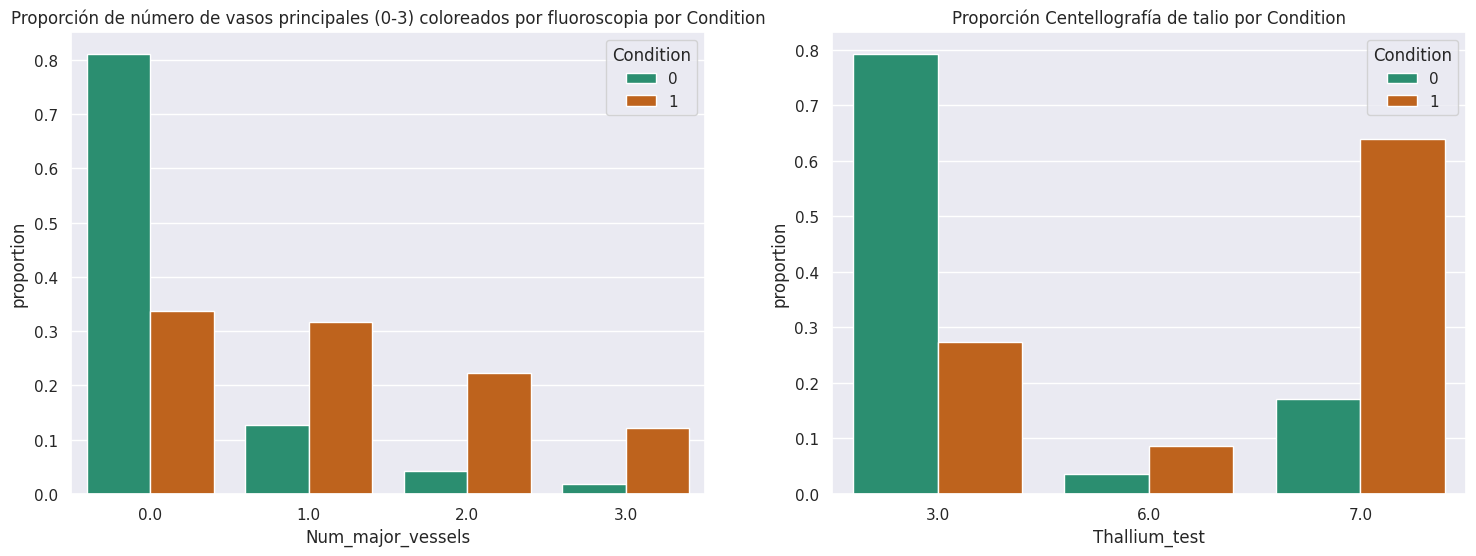

In [ ]:
def heart_functions2_condition(data):

    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Num_major_vessels'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Num_major_vessels', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proporción de número de vasos principales (0-3) coloreados por fluoroscopia por Condition')

    # Thallium
    plt.subplot(1, 2, 2)
    data['Thallium_test'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thallium_test', y='proportion', hue='Condition', palette='Dark2')
    plt.title('Proporción Centellografía de talio por Condition')
    plt.show()


heart_functions2_condition(df);

### 4-6. Feature Variable - ```Age```

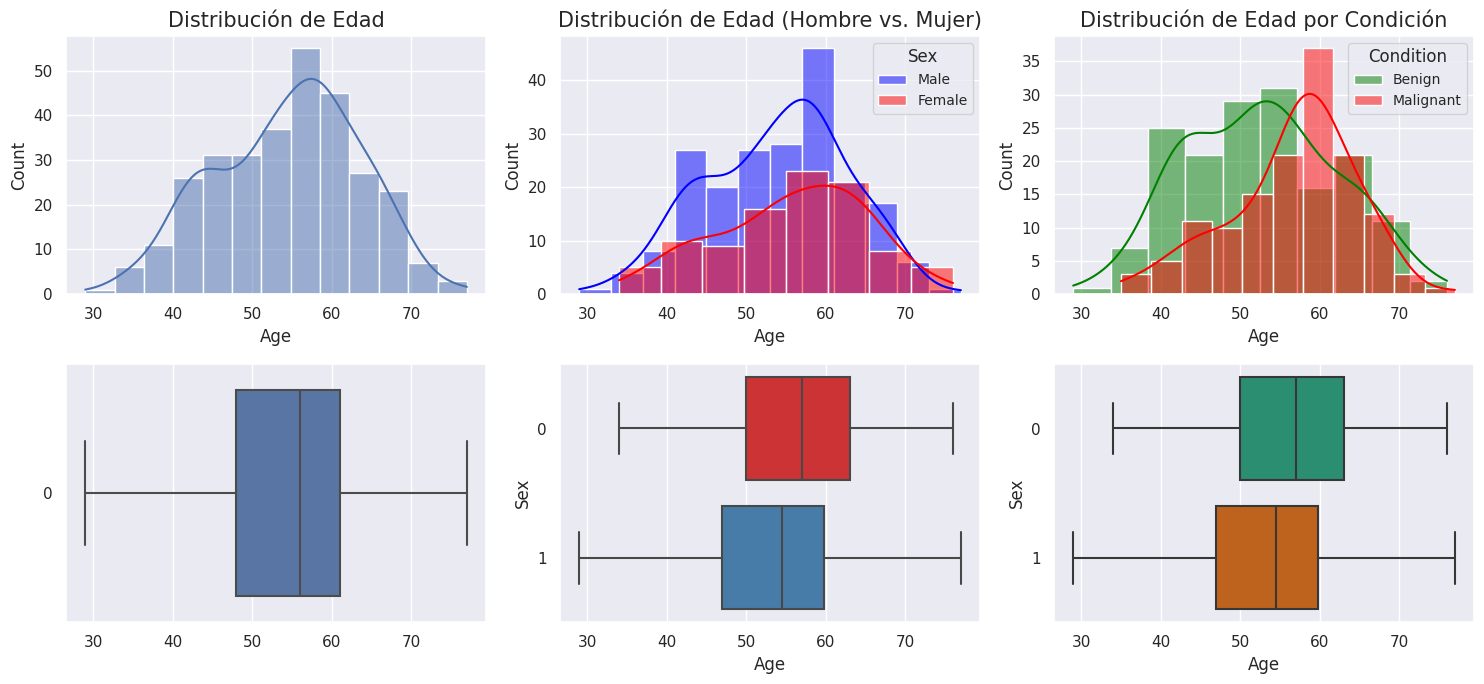

In [ ]:
def age_distribution(data):
    fig = plt.figure(figsize=(15, 7))

    # Distribución de Edad
    plt.subplot(2, 3, 1)
    sns.histplot(data['Age'], kde=True)  # Corrección a sns.histplot
    plt.title('Distribución de Edad', fontsize=15)

    plt.subplot(2, 3, 4)
    sns.boxplot(data['Age'], orient='h')


    # Distribución de Edad por sexo
    plt.subplot(2, 3, 2)
    female = data[data['Sex']==0]['Age']  # Corrección a data en lugar de df
    male = data[data['Sex']==1]['Age']  # Corrección a data en lugar de df
    sns.histplot(male, color='Blue', label='Male', kde=True)  # Corrección a sns.histplot
    sns.histplot(female, color='Red', label='Female', kde=True)  # Corrección a sns.histplot
    plt.title('Distribución de Edad (Hombre vs. Mujer)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')


    # Distribución de Edad por Condición
    plt.subplot(2, 3, 3)
    benign = data[data['Condition']==0]['Age']  # Corrección a data en lugar de df
    malignant = data[data['Condition']==1]['Age']  # Corrección a data en lugar de df

    sns.histplot(benign, color='Green', label='Benign', kde=True)  # Corrección a sns.histplot
    sns.histplot(malignant, color='Red', label='Malignant', kde=True)  # Corrección a sns.histplot
    plt.title('Distribución de Edad por Condición', fontsize=15)
    plt.legend(title='Condition', fontsize=10)

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

    plt.tight_layout()
    plt.show()


age_distribution(df)


### 4-7. ```Age``` vs. mutiples caracteristicas para ```Condition```

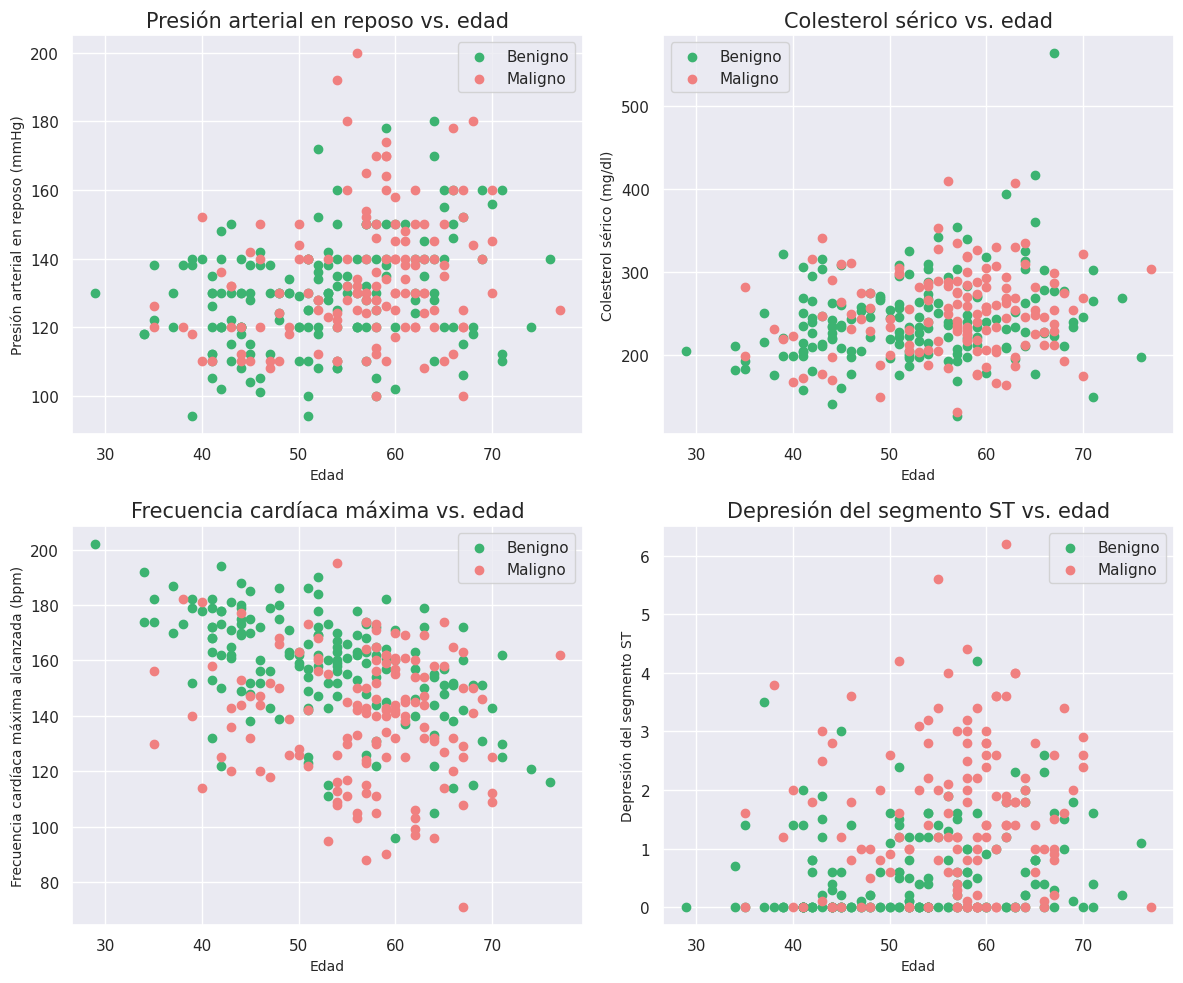

In [ ]:
def caracteristicas_numericas_vs_edad(data):

    benigno = data.Condition==0
    maligno = data.Condition==1

    edad_benigno = data.Age[benigno]
    edad_maligno = data.Age[maligno]

    color_b = 'MediumSeaGreen'
    color_m = 'LightCoral'

    fig = plt.figure(figsize=(12, 10))

    # Presión arterial en reposo (mmHg)
    plt.subplot(2, 2, 1)
    plt.scatter(x=edad_benigno, y=data.Resting_bp[benigno], color=color_b)
    plt.scatter(x=edad_maligno, y=data.Resting_bp[maligno], color=color_m)
    plt.title('Presión arterial en reposo vs. edad', fontsize=15)
    plt.legend(['Benigno', 'Maligno'])
    plt.xlabel('Edad', fontsize=10)
    plt.ylabel('Presión arterial en reposo (mmHg)', fontsize=10)


    # Colesterol sérico (mg/dl)
    plt.subplot(2, 2, 2)
    plt.scatter(x=edad_benigno, y=data.Cholesterol[benigno], color=color_b)
    plt.scatter(x=edad_maligno, y=data.Cholesterol[maligno], color=color_m)
    plt.title('Colesterol sérico vs. edad', fontsize=15)
    plt.legend(['Benigno', 'Maligno'])
    plt.xlabel('Edad', fontsize=10)
    plt.ylabel('Colesterol sérico (mg/dl)', fontsize=10)


    # Frecuencia cardíaca máxima alcanzada (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=edad_benigno, y=data.Max_heart_rate[benigno], color=color_b)
    plt.scatter(x=edad_maligno, y=data.Max_heart_rate[maligno], color=color_m)
    plt.title('Frecuencia cardíaca máxima vs. edad', fontsize=15)
    plt.legend(['Benigno', 'Maligno'])
    plt.xlabel('Edad',fontsize=10)
    plt.ylabel('Frecuencia cardíaca máxima alcanzada (bpm)', fontsize=10)


    # Depresión del segmento ST
    plt.subplot(2, 2, 4)
    plt.scatter(x=edad_benigno, y=data.ST_depression[benigno], color=color_b)
    plt.scatter(x=edad_maligno, y=data.ST_depression[maligno], color=color_m)
    plt.title('Depresión del segmento ST vs. edad', fontsize=15)
    plt.legend(['Benigno', 'Maligno'])
    plt.xlabel('Edad',fontsize=10)
    plt.ylabel('Depresión del segmento ST', fontsize=10)

    plt.tight_layout()
    plt.show()


caracteristicas_numericas_vs_edad(df)


#### **Observations**  
```Resing_bp```  
* Las personas mayores de 50 años tienen un rango más amplio de presión arterial, pero parece que no hay relación entre la presión arterial en reposo y la edad para la condición.

```ST_depression```  
* En cualquier edad, las personas que tienen una depresión del segmento ST superficial están expuestas a una condición <font color="Coral">Maligna</font>.


### 4-8. Feature vs. Feature para ```Condition```

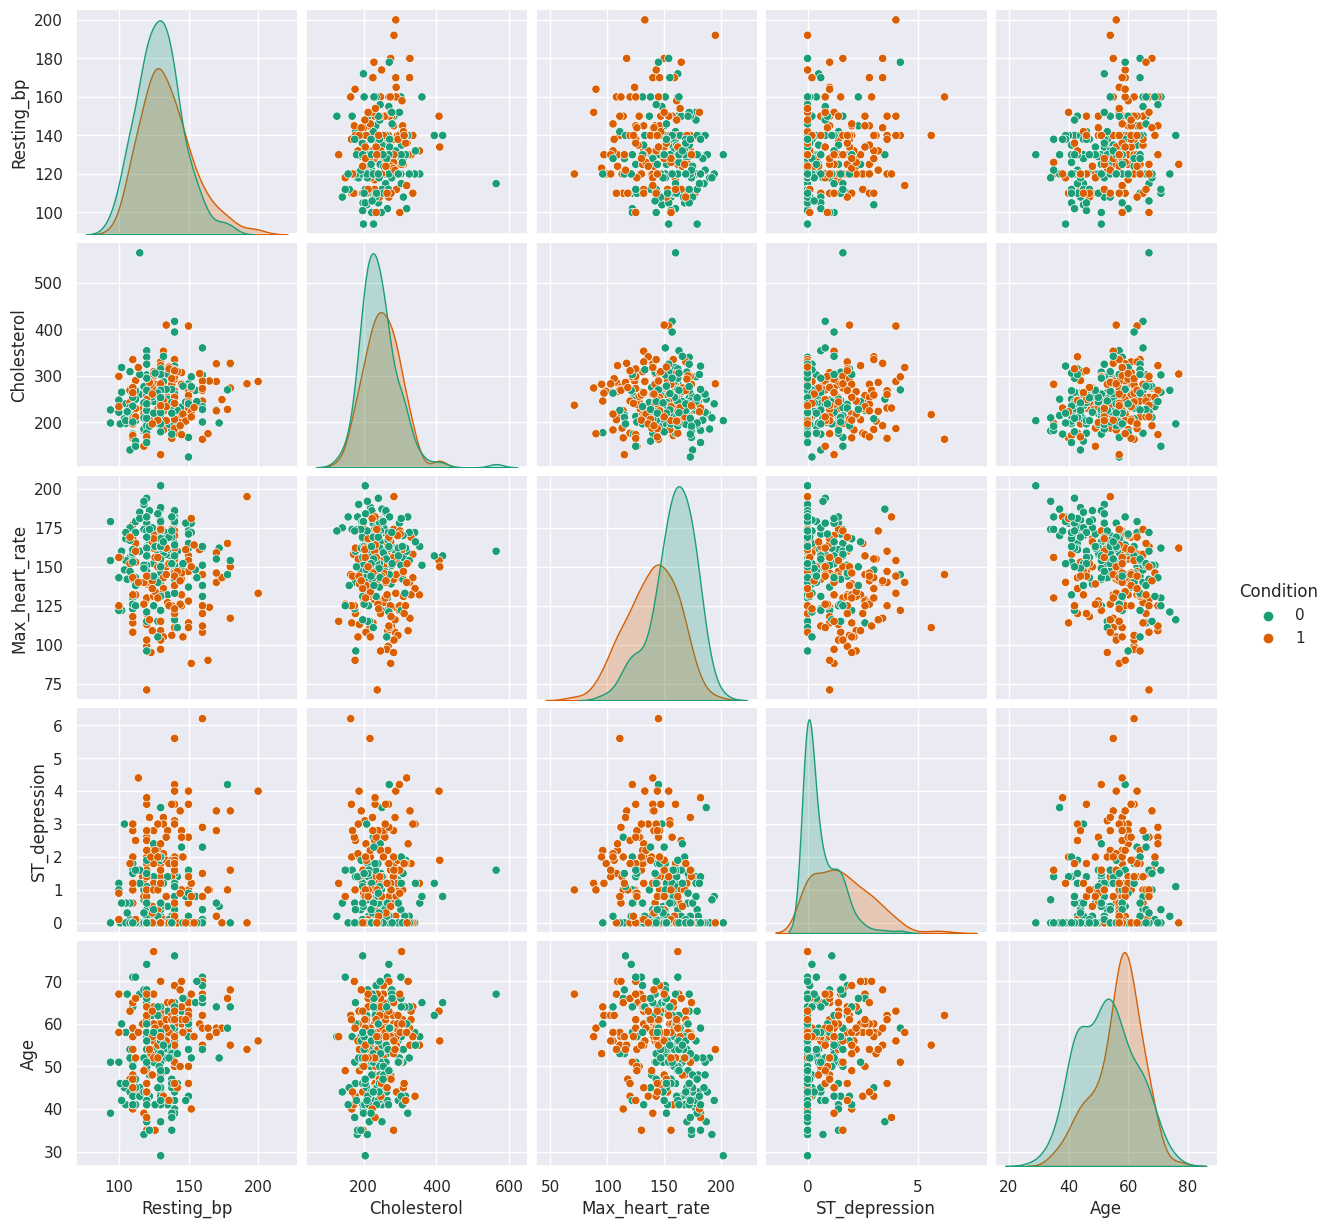

In [ ]:
sns.pairplot(df[['Resting_bp','Cholesterol','Max_heart_rate','ST_depression','Age', 'Condition']],hue='Condition', palette='Dark2');

### 4-9. Correlación

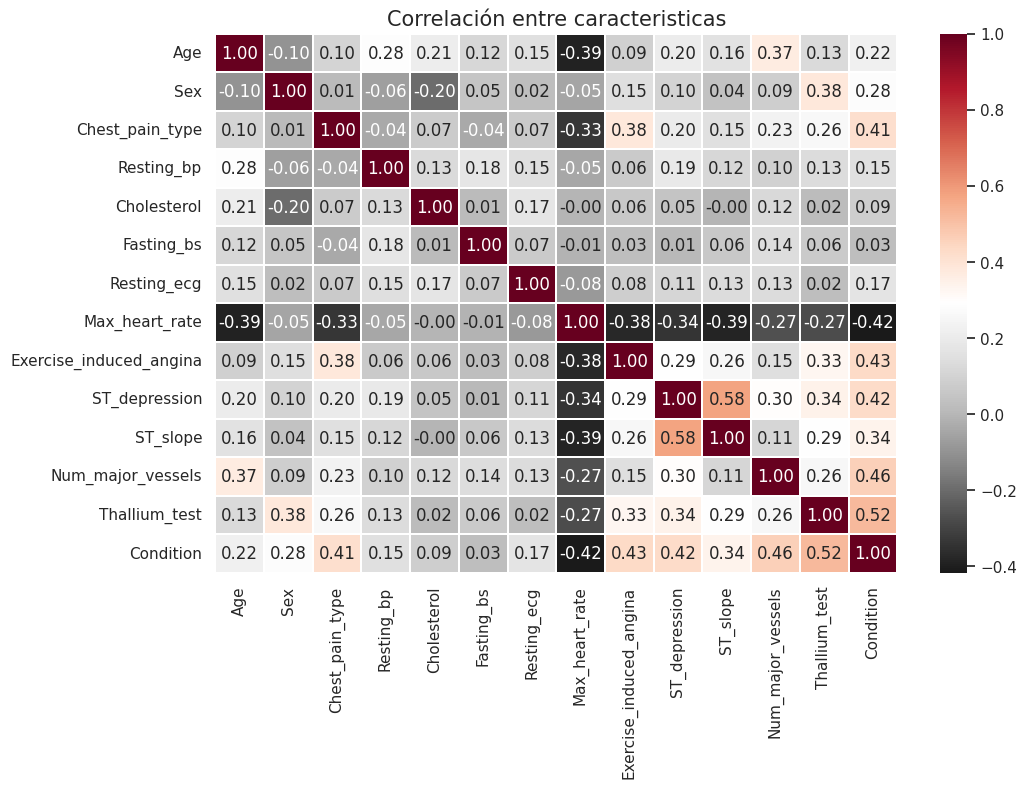

In [ ]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlación entre caracteristicas', fontsize=15)
    plt.show()


correlation_heatmap(df);